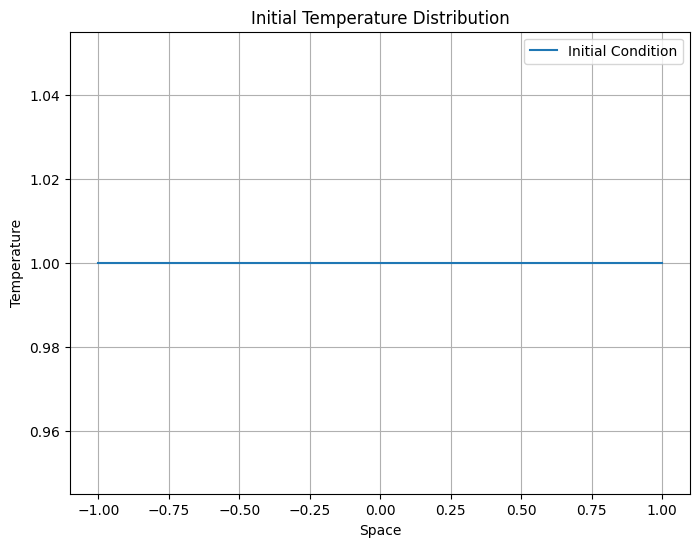

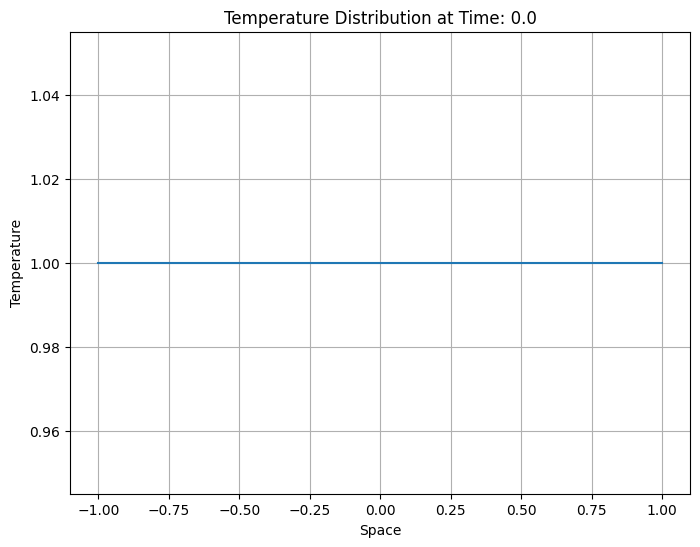

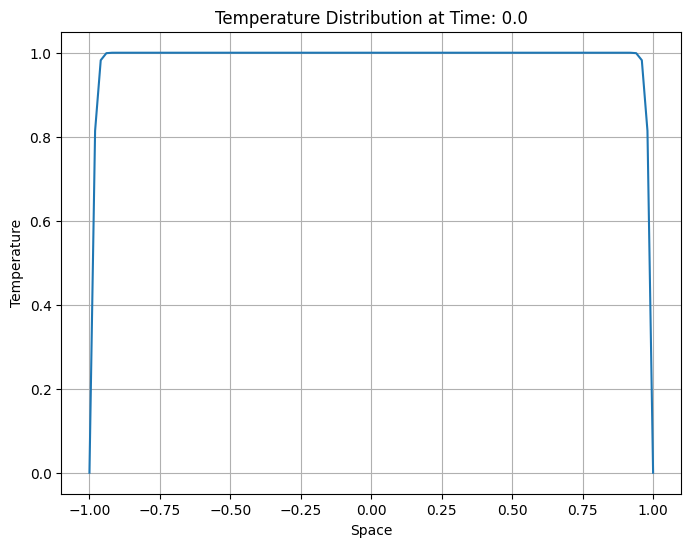

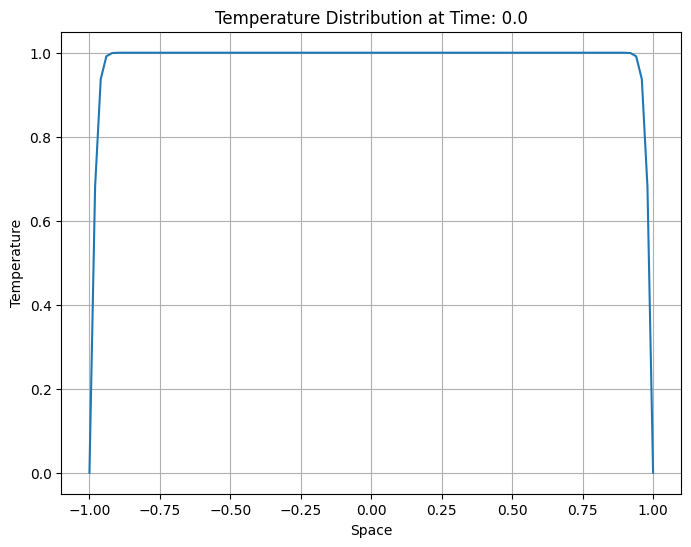

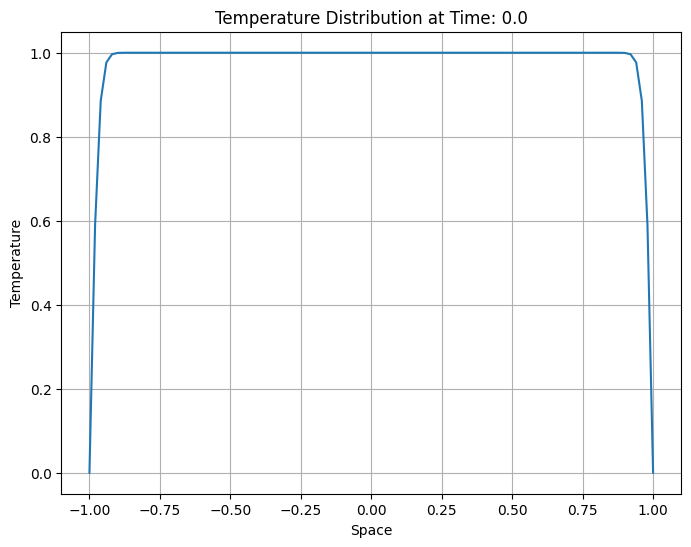

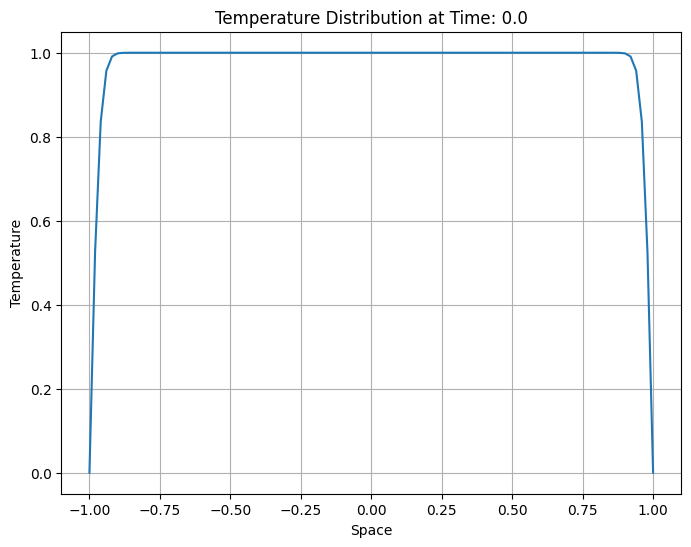

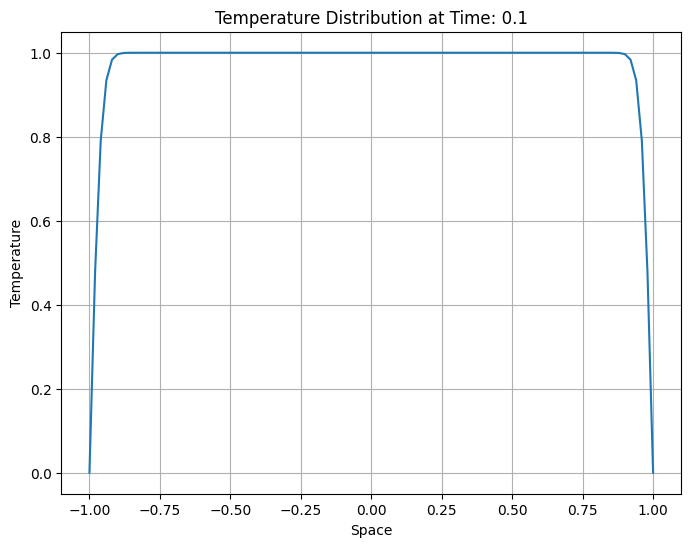

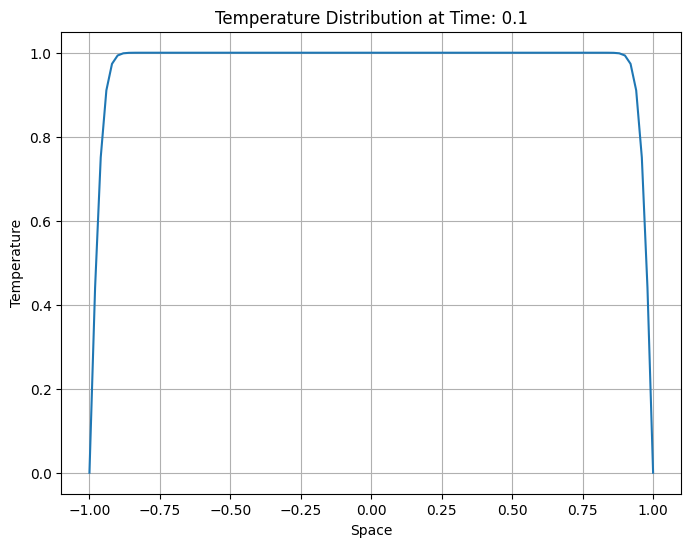

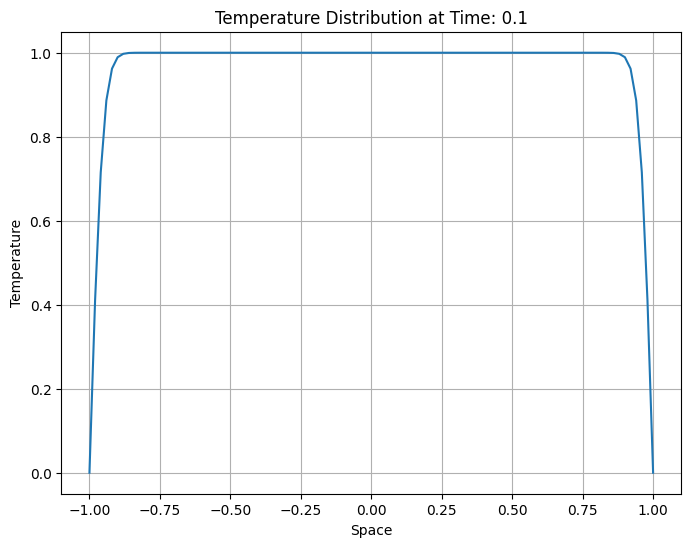

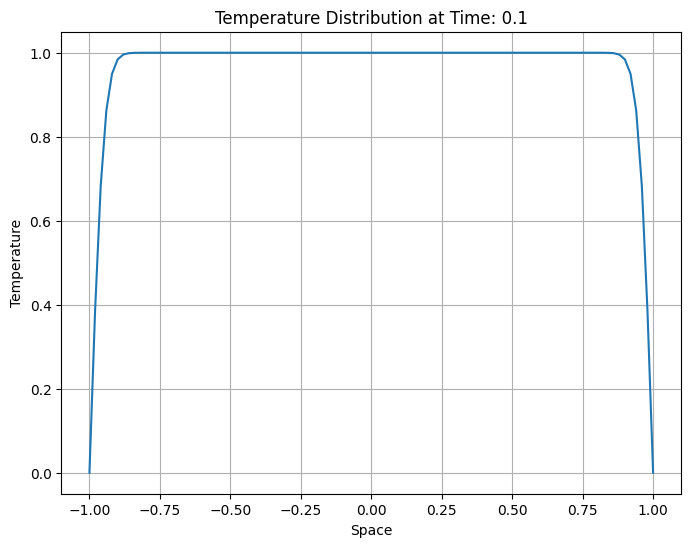

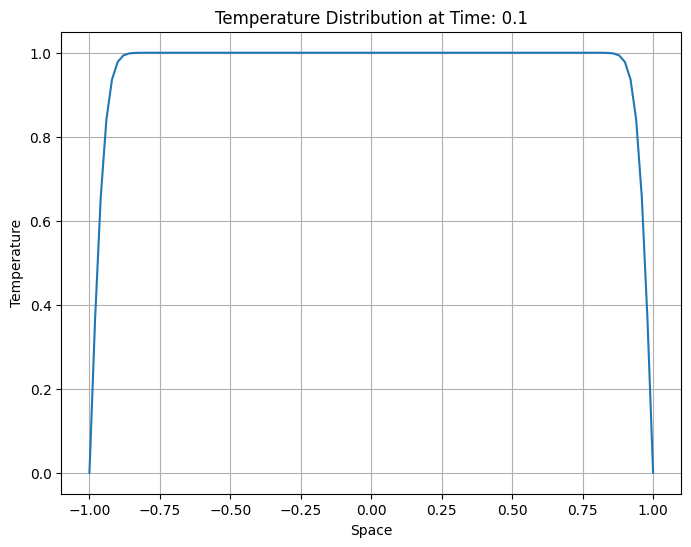

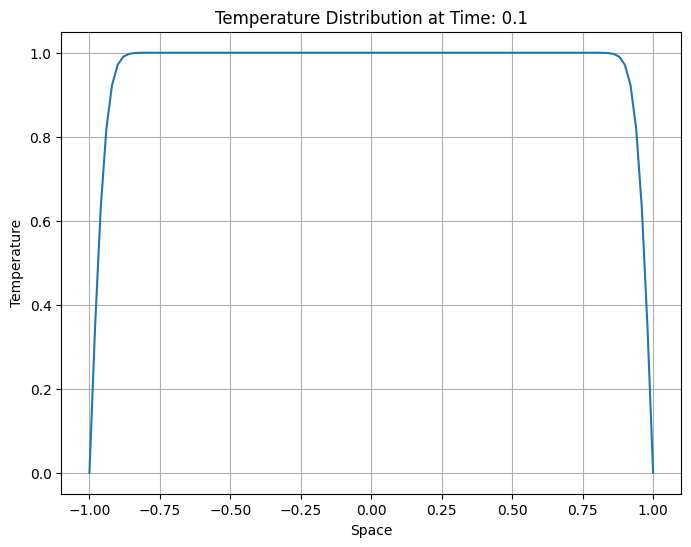

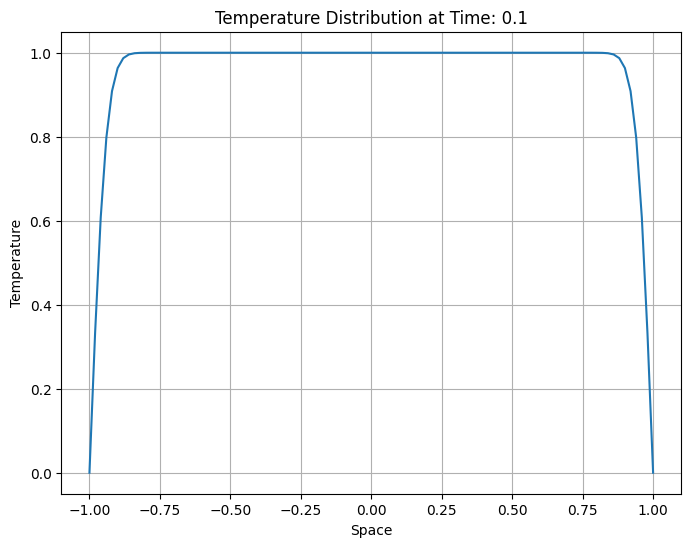

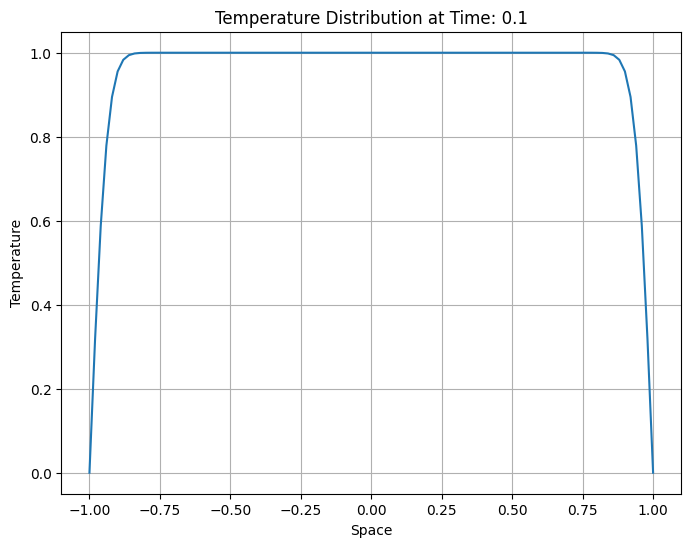

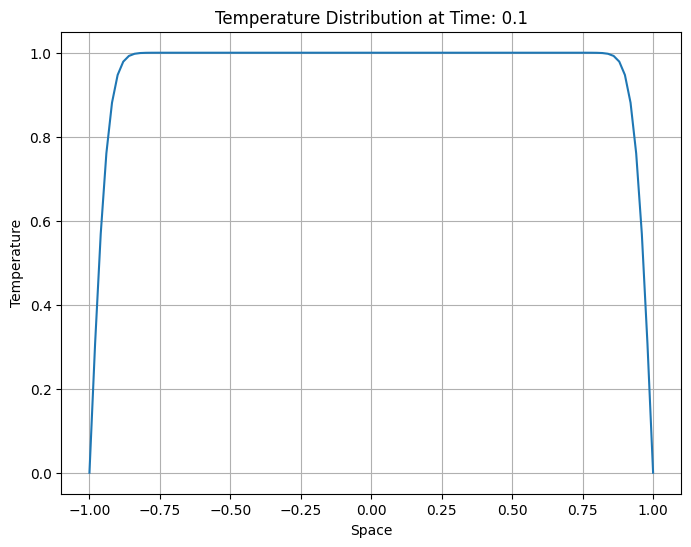

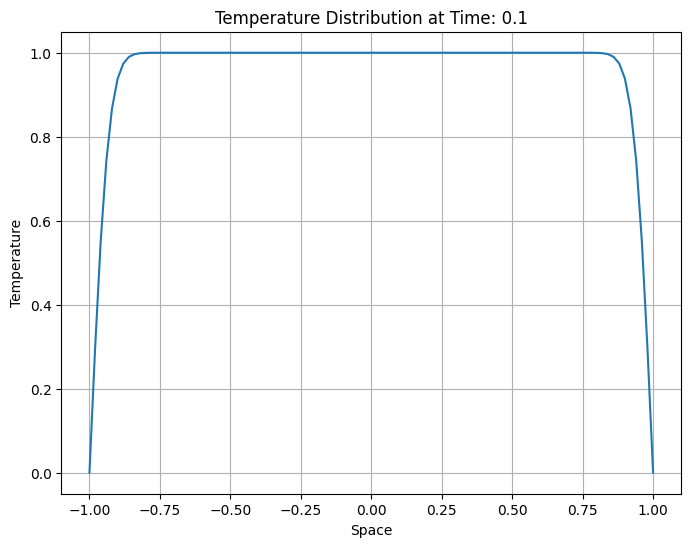

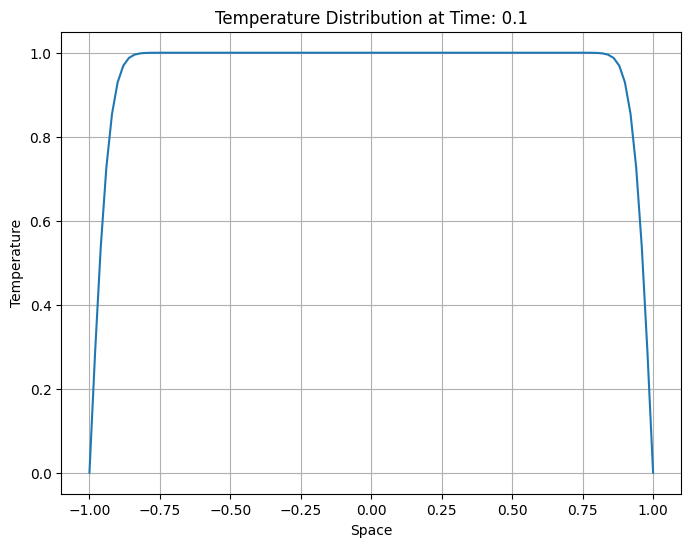

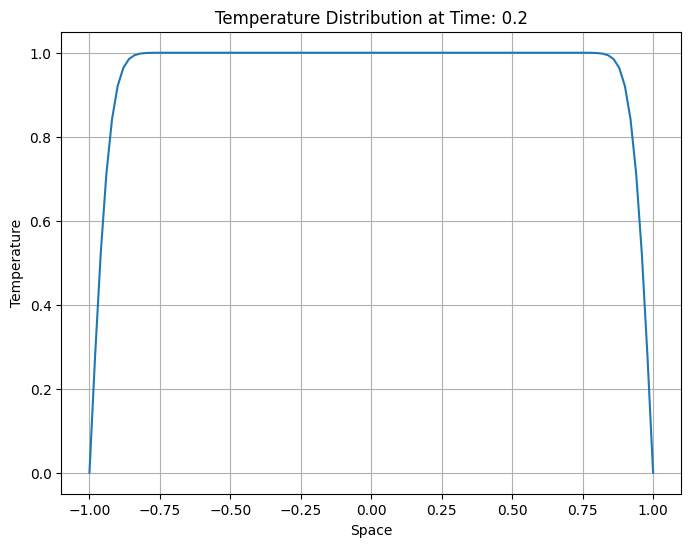

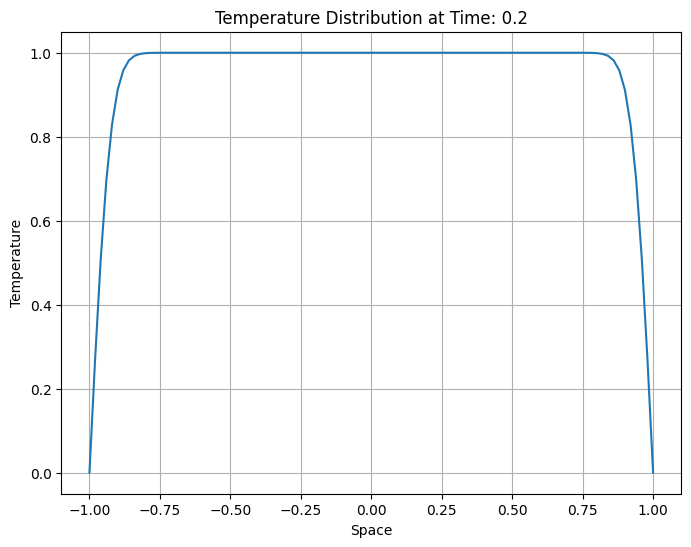

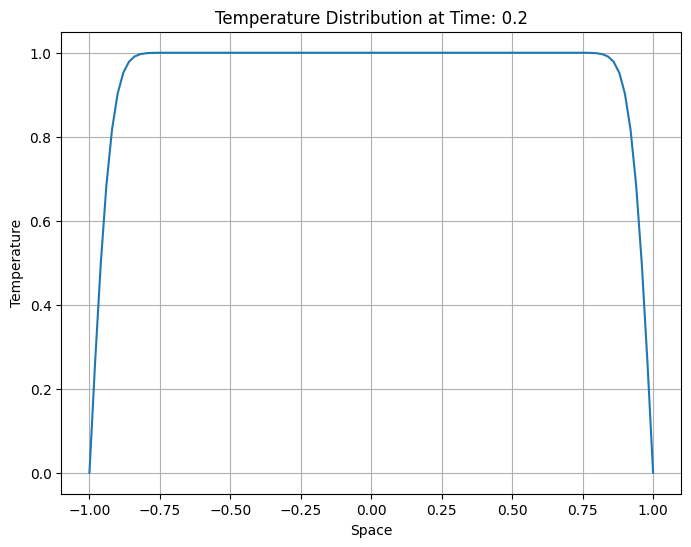

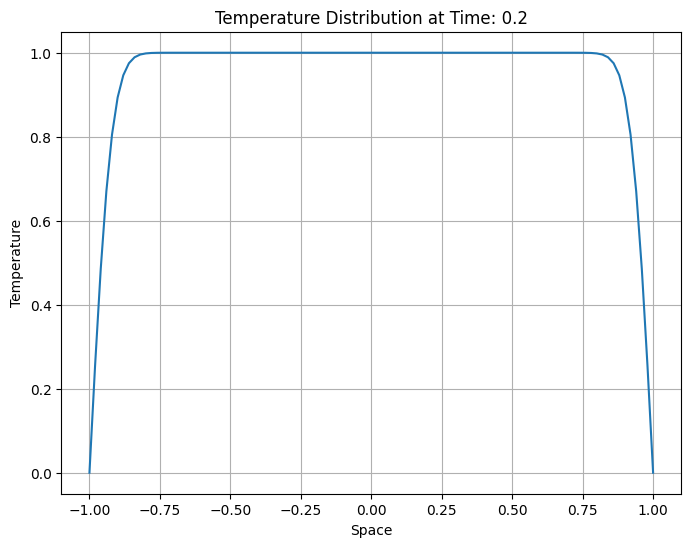

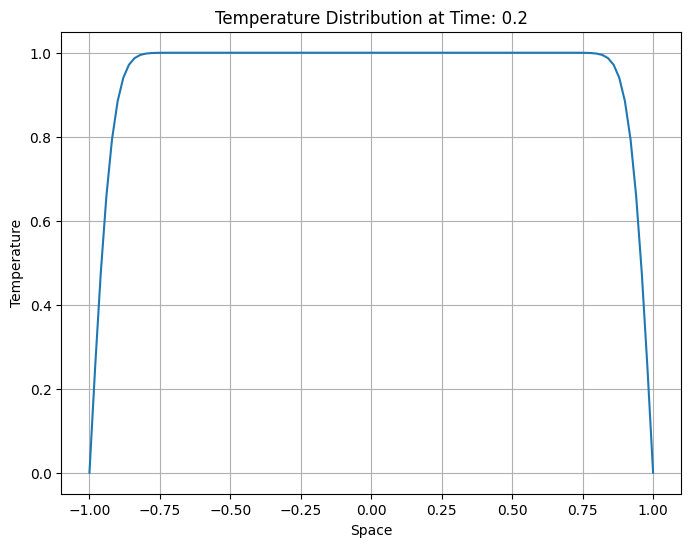

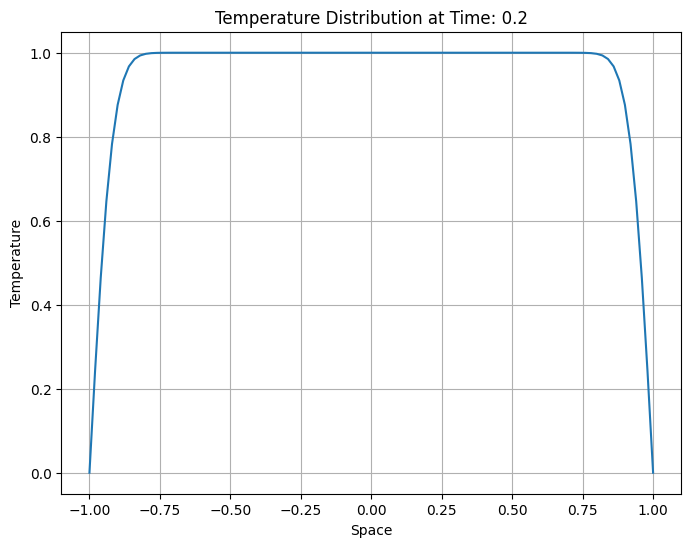

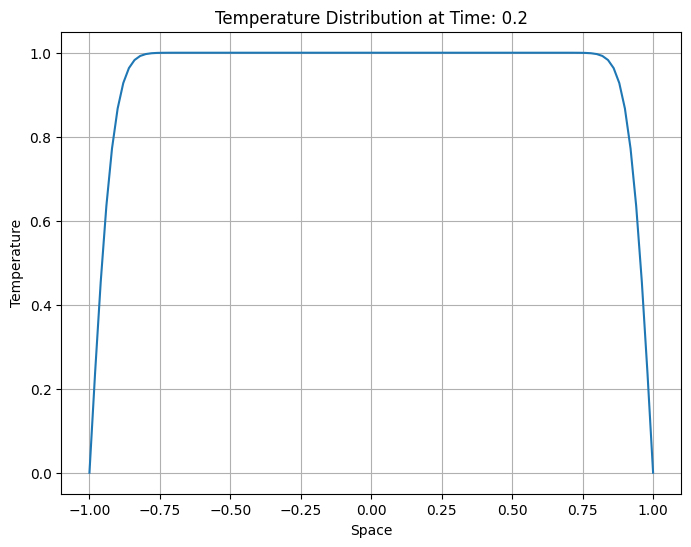

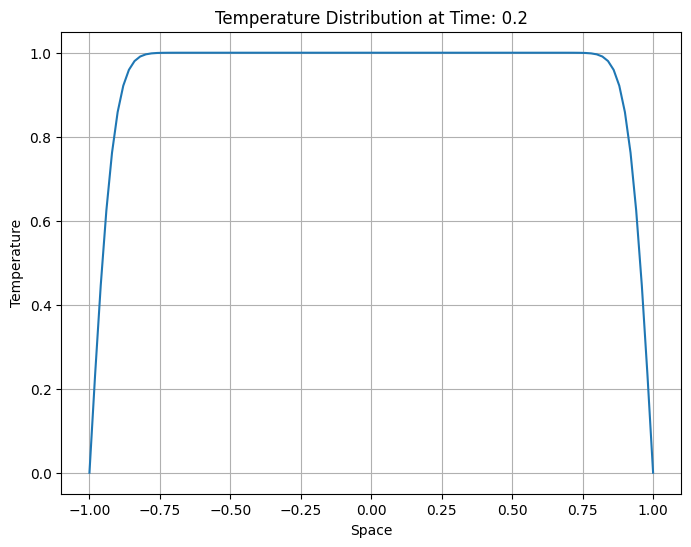

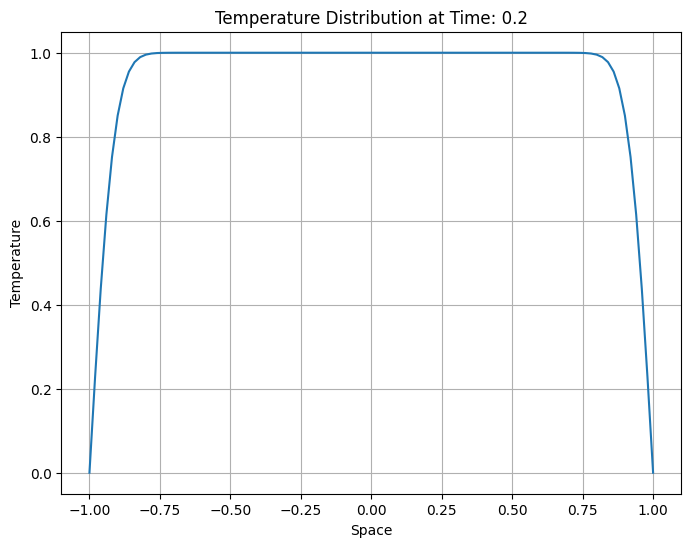

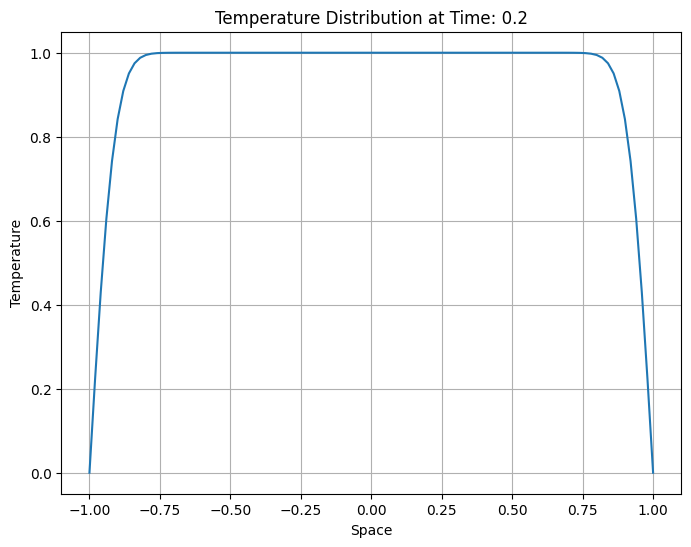

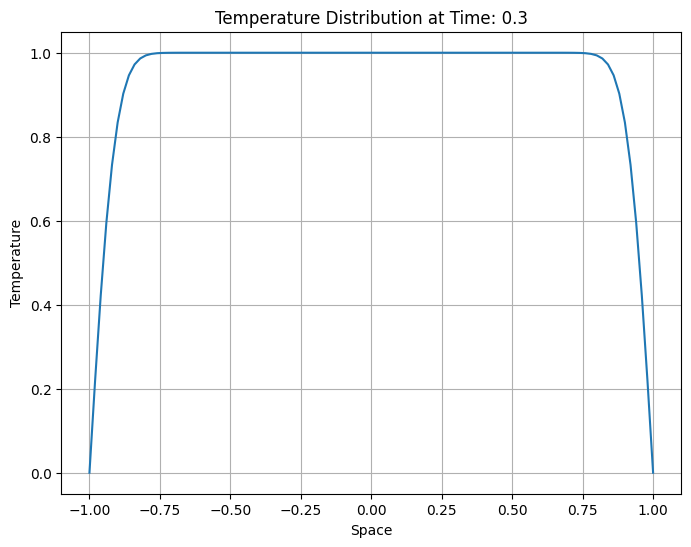

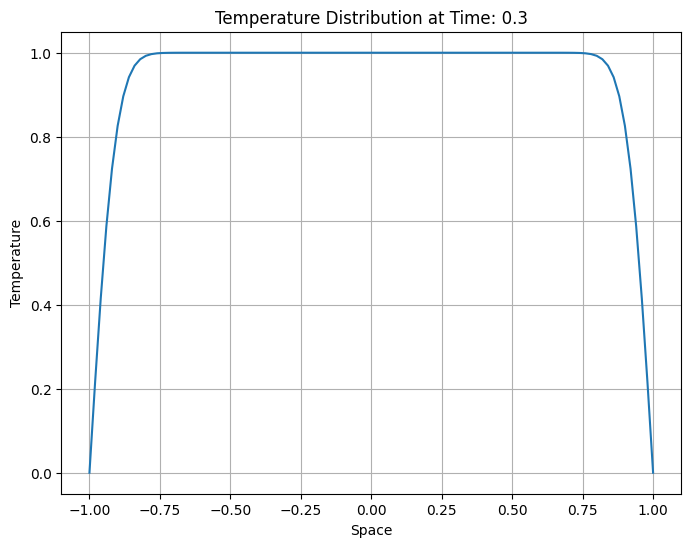

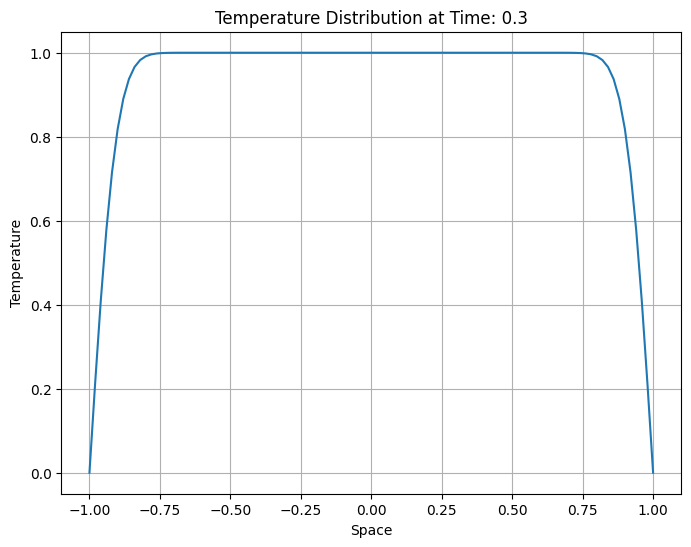

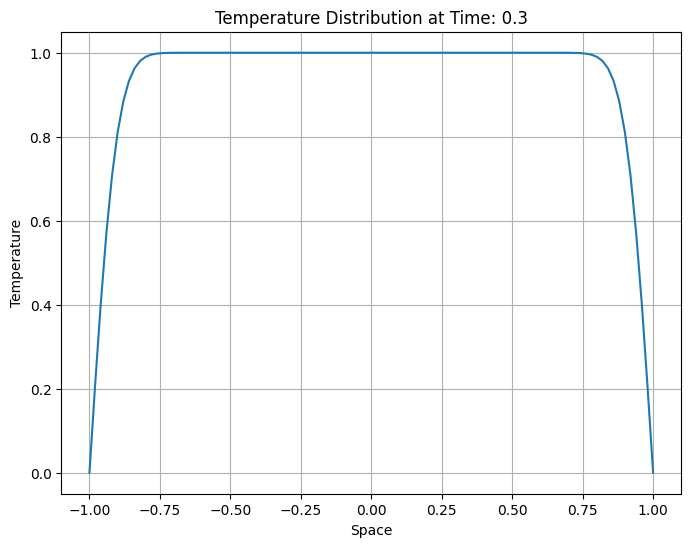

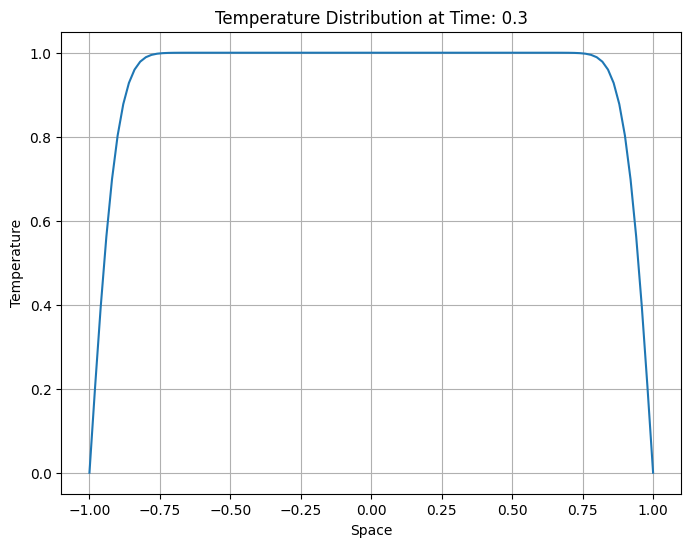

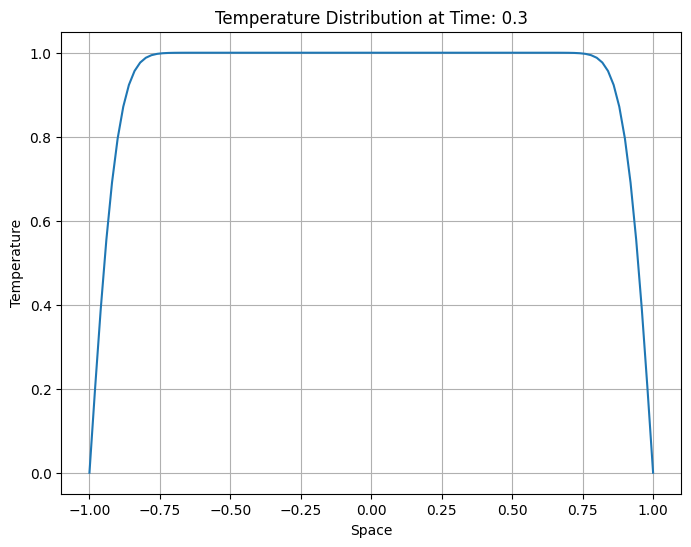

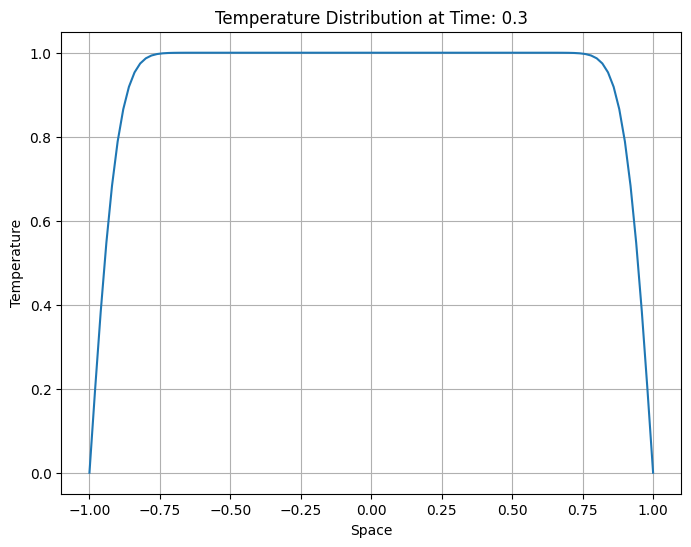

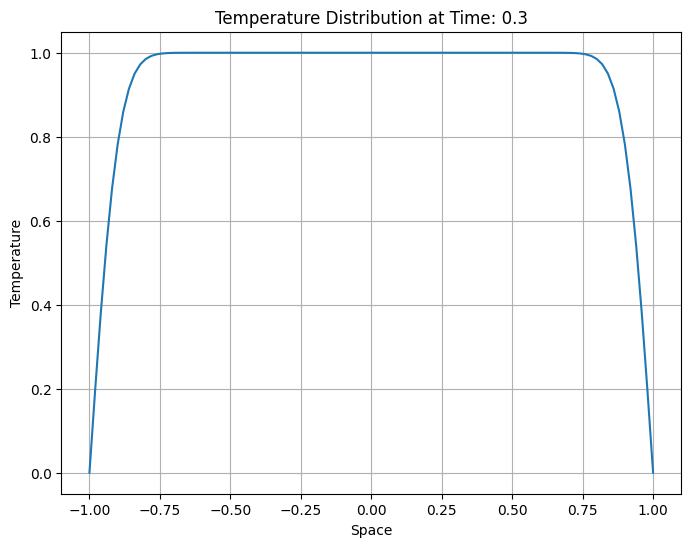

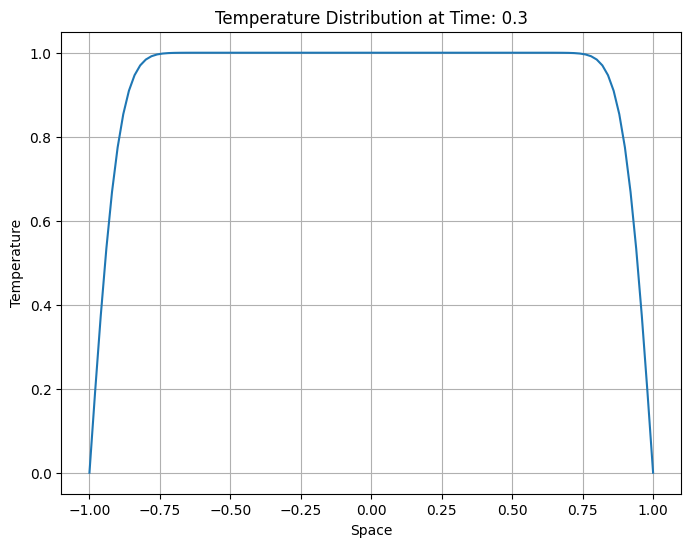

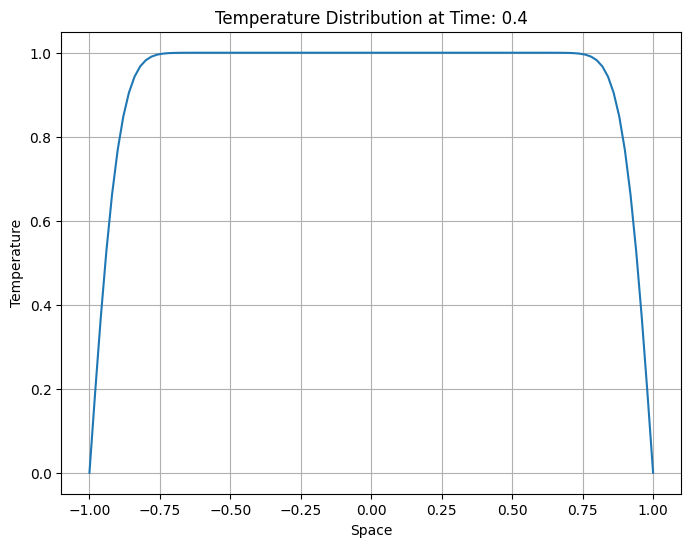

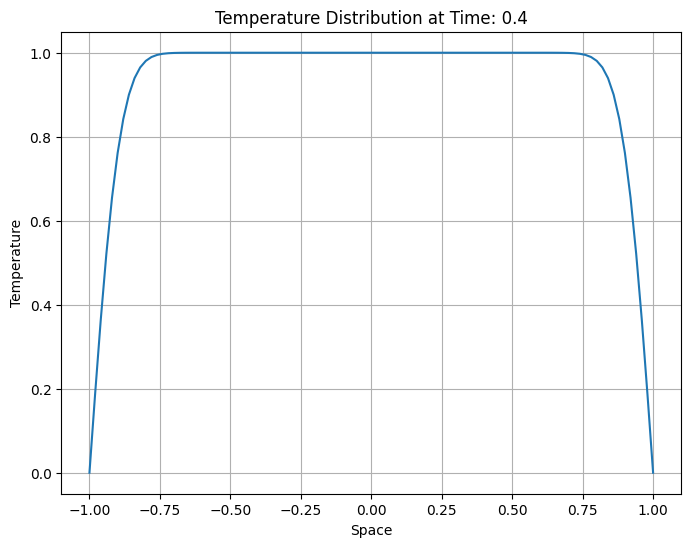

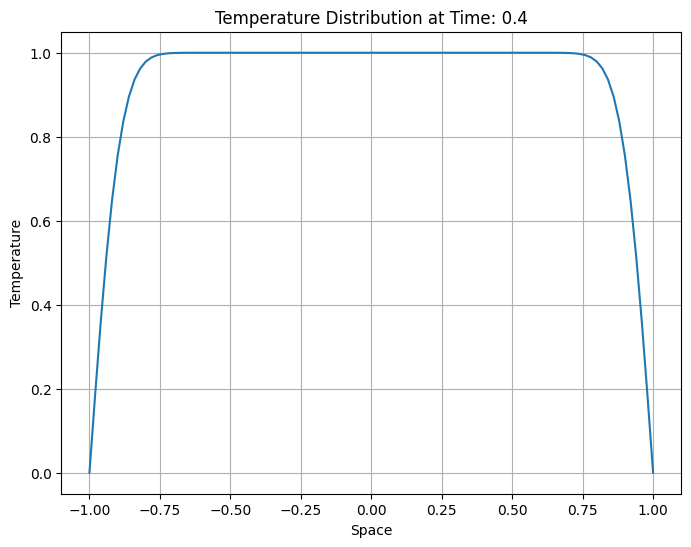

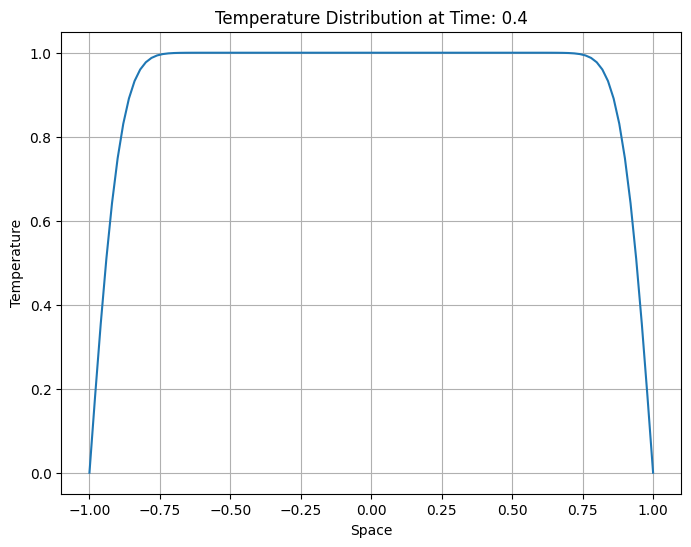

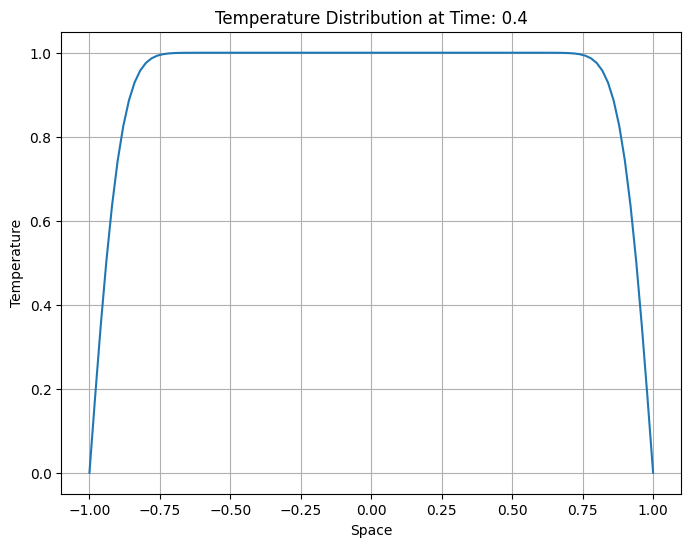

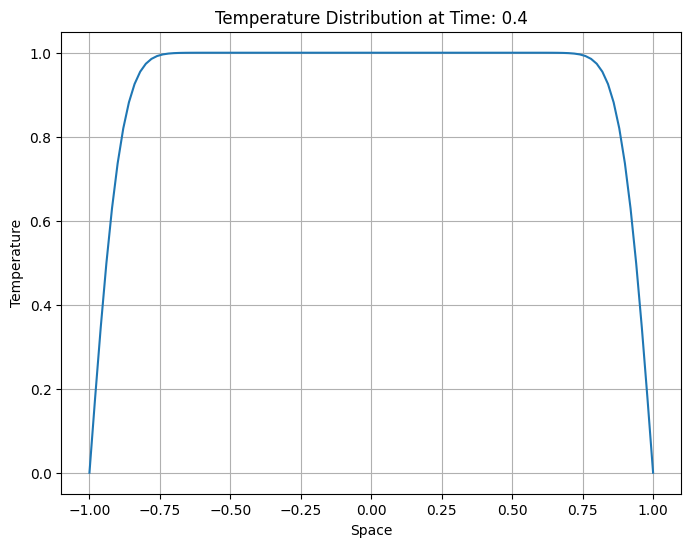

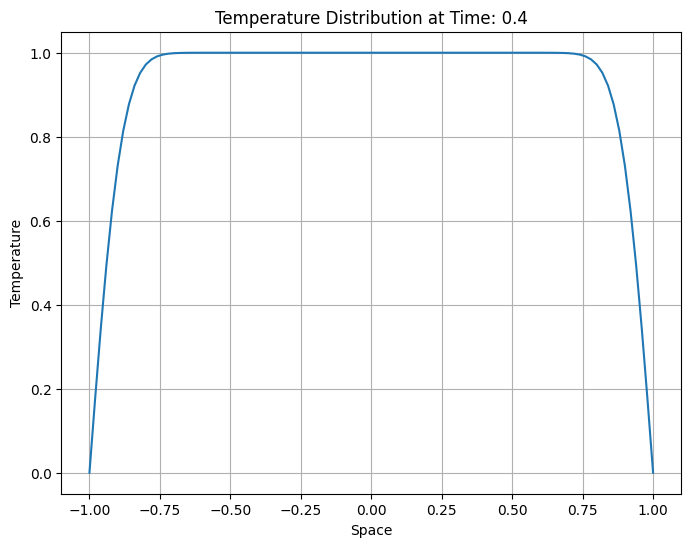

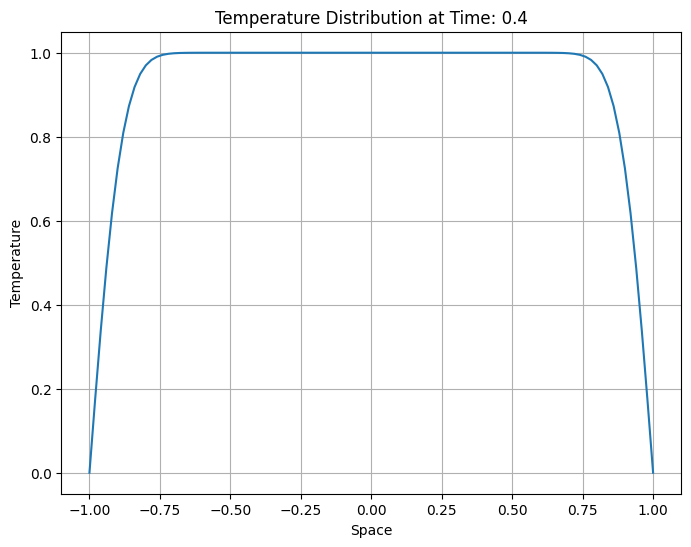

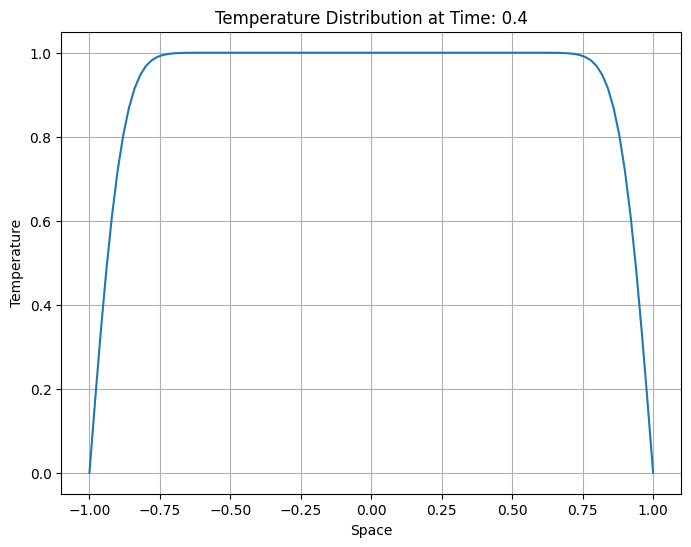

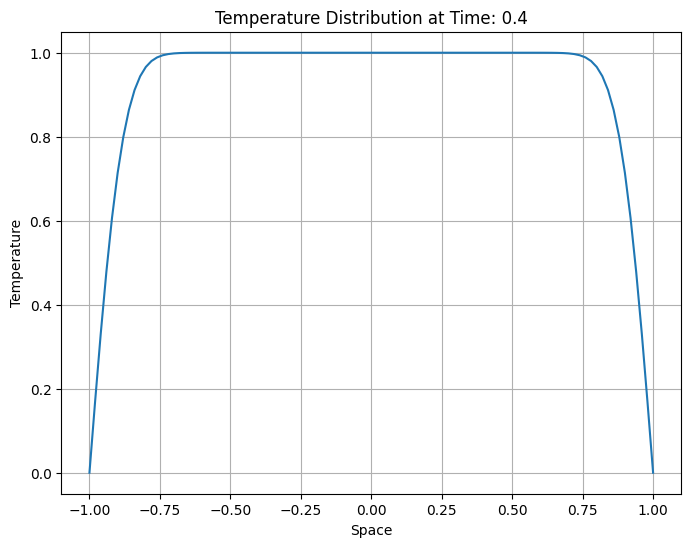

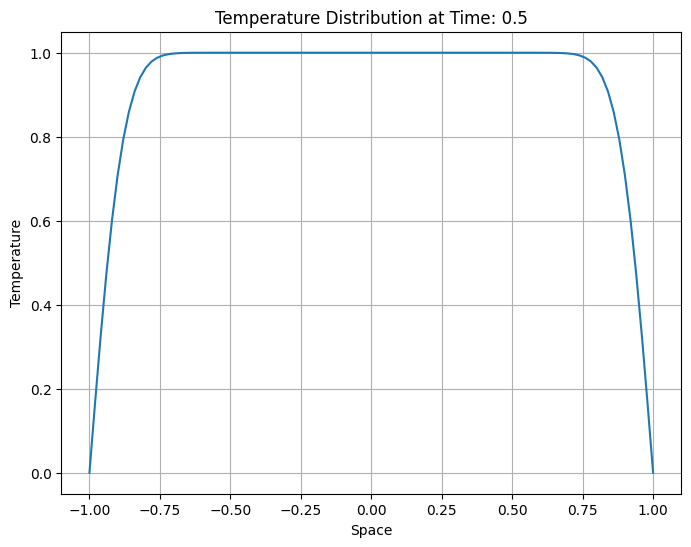

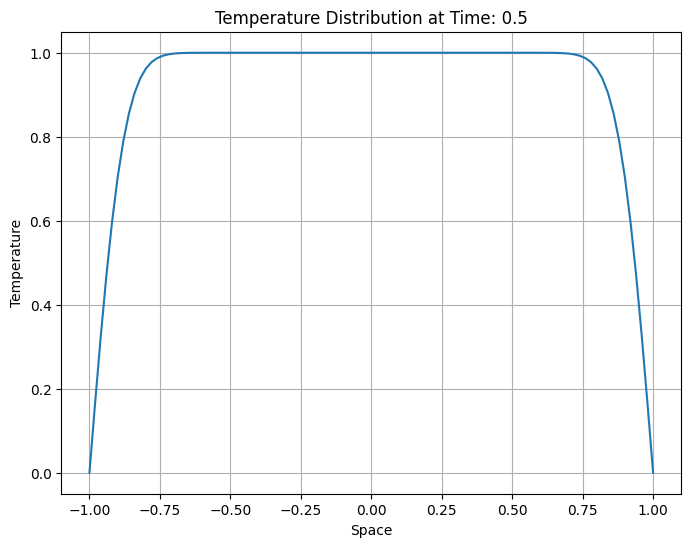

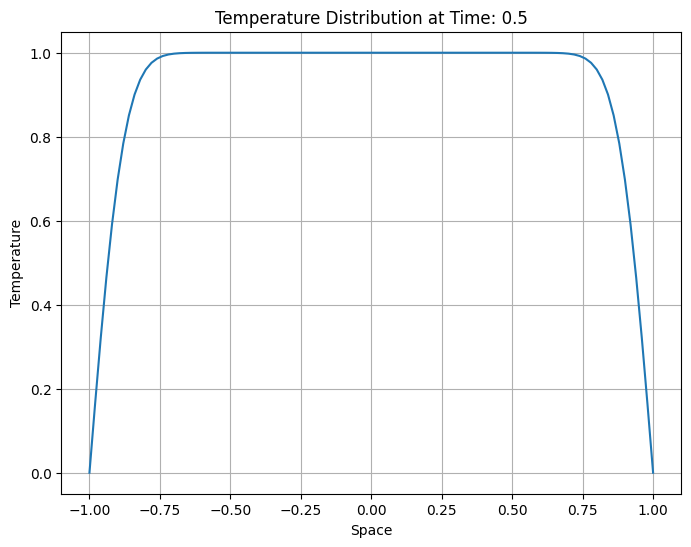

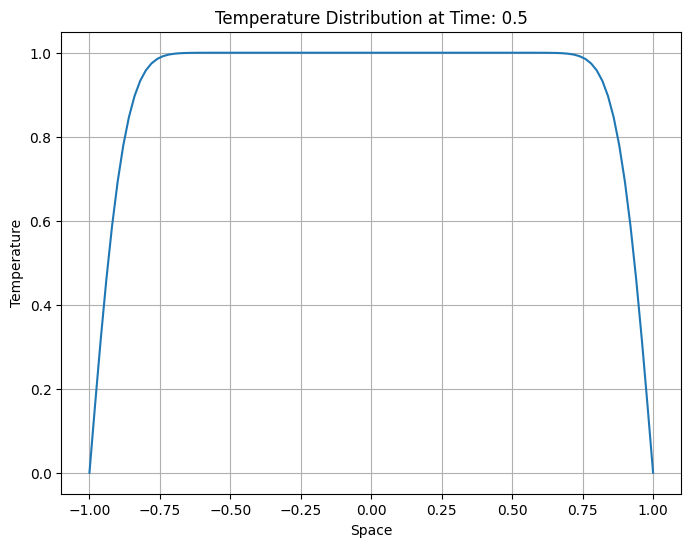

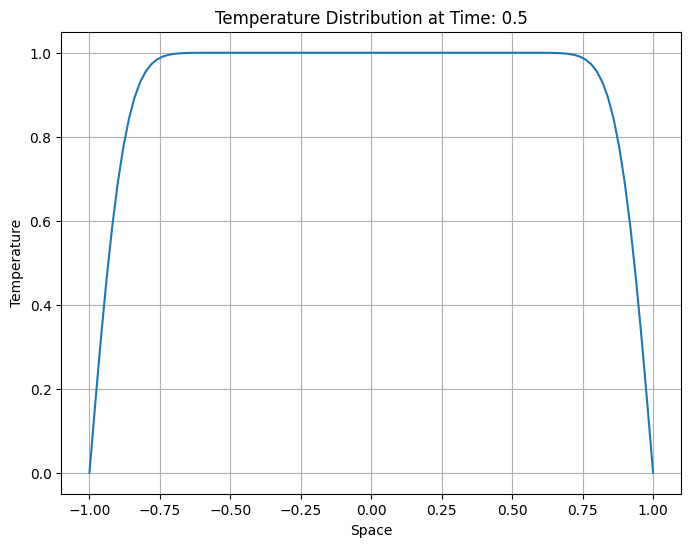

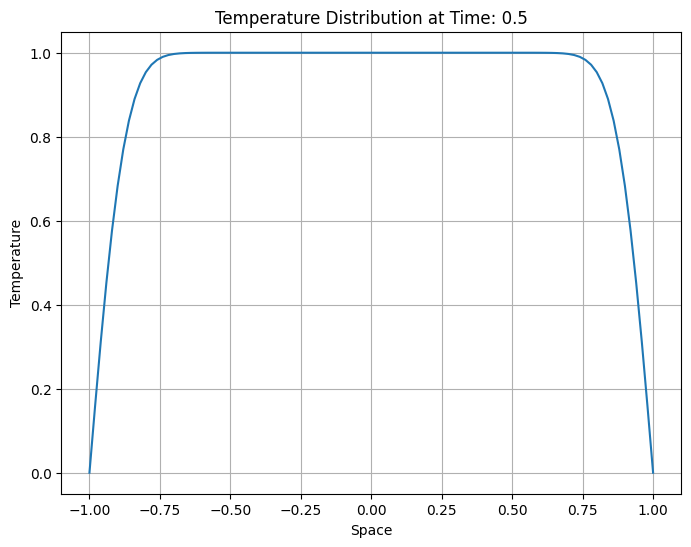

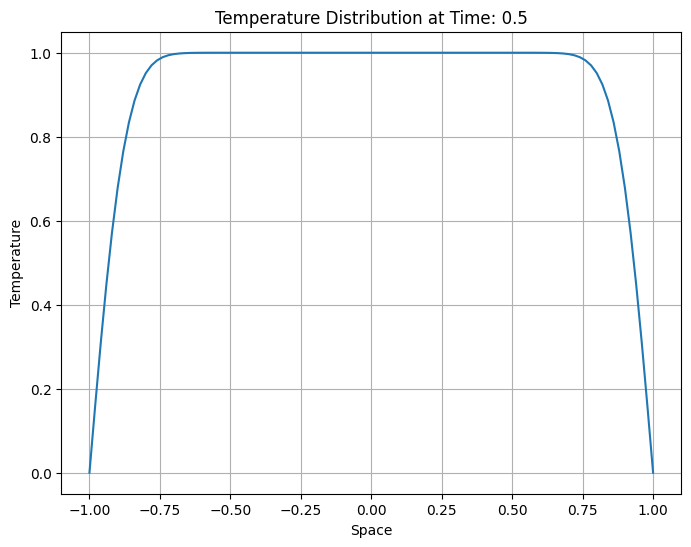

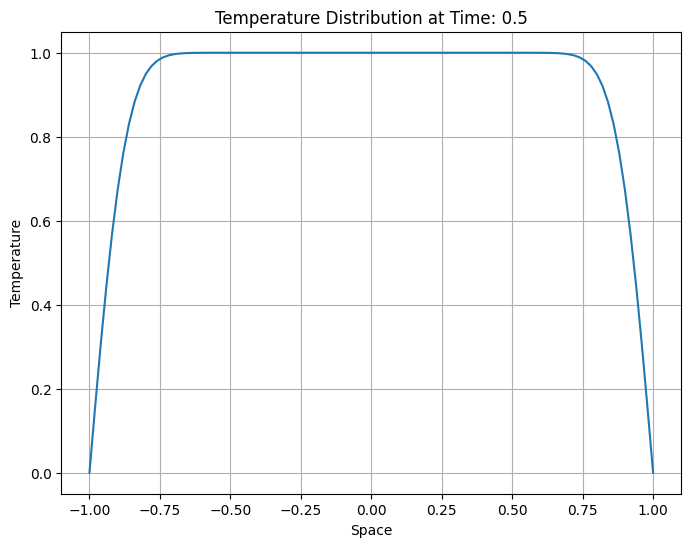

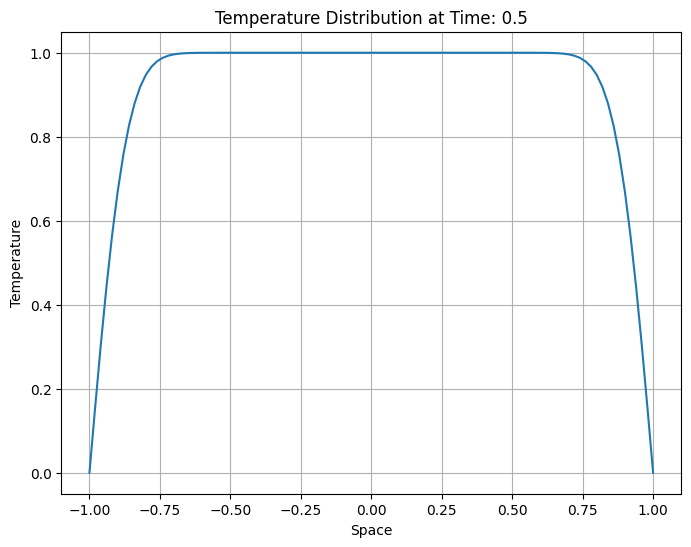

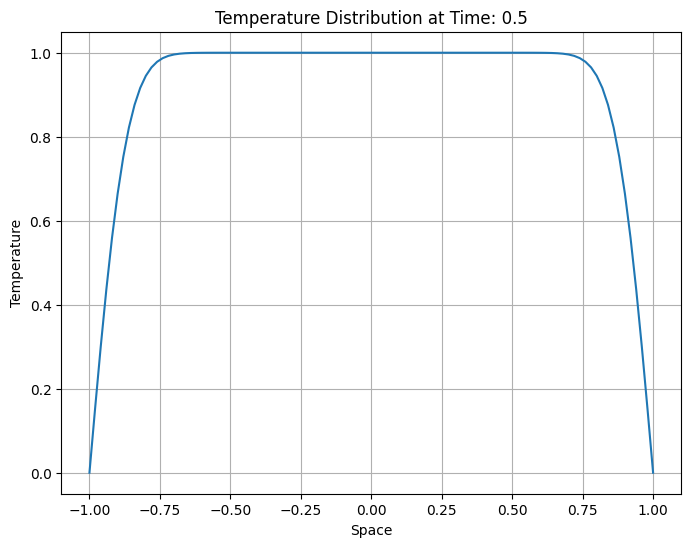

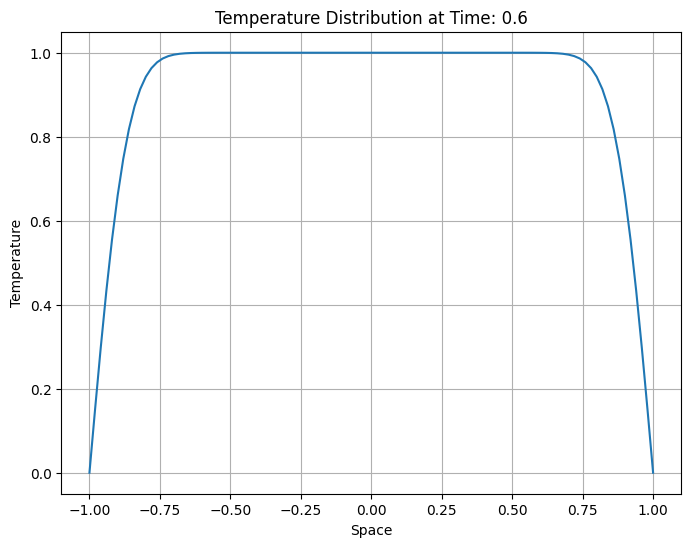

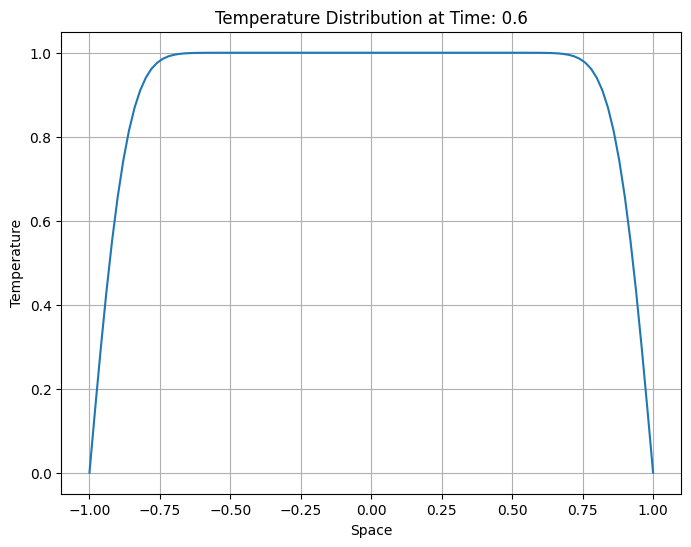

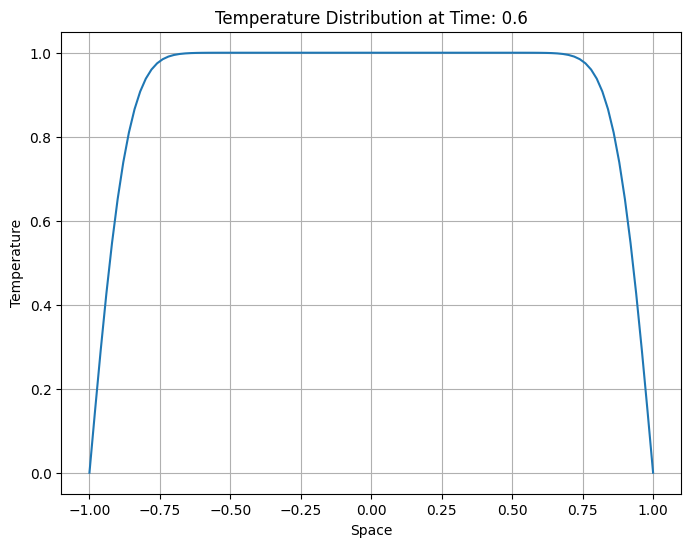

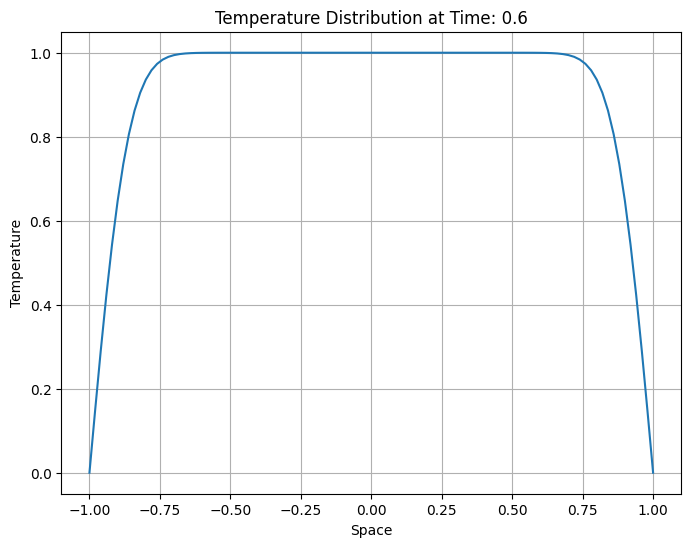

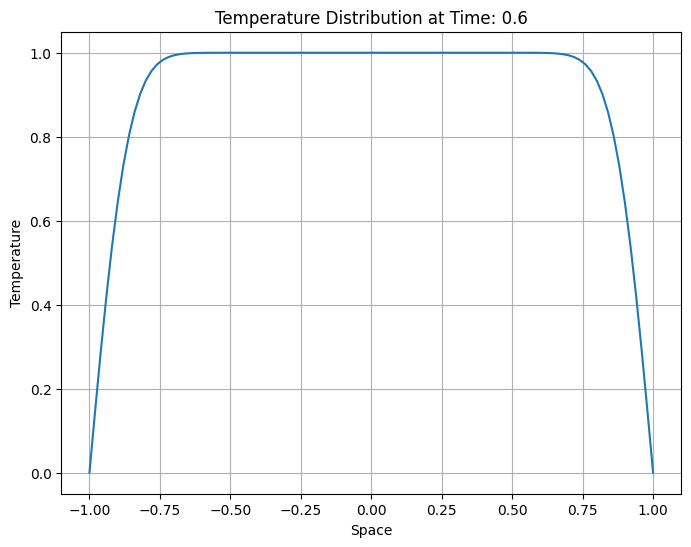

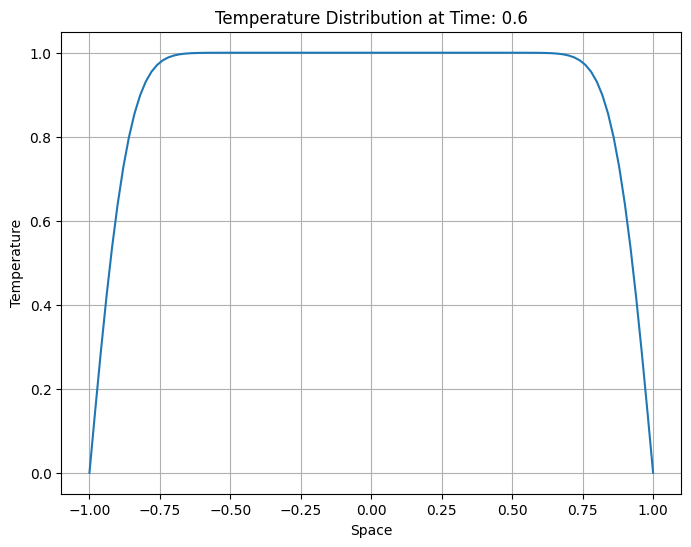

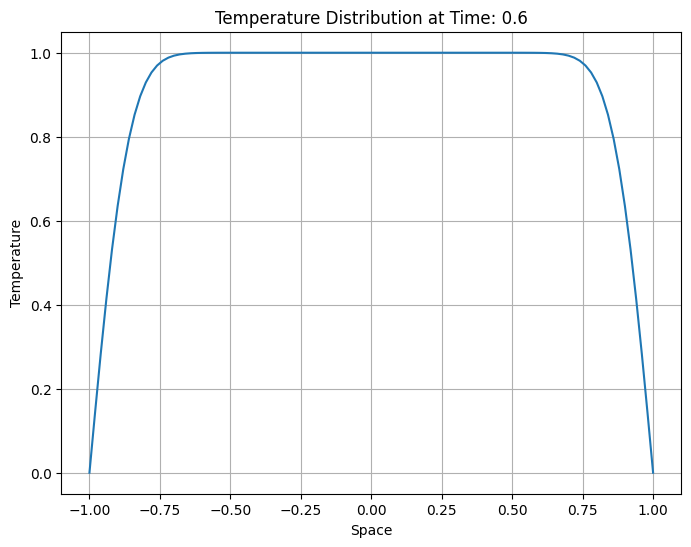

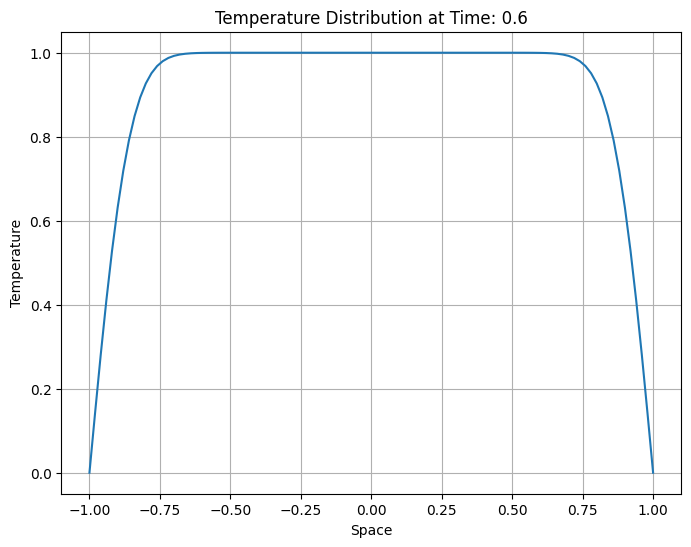

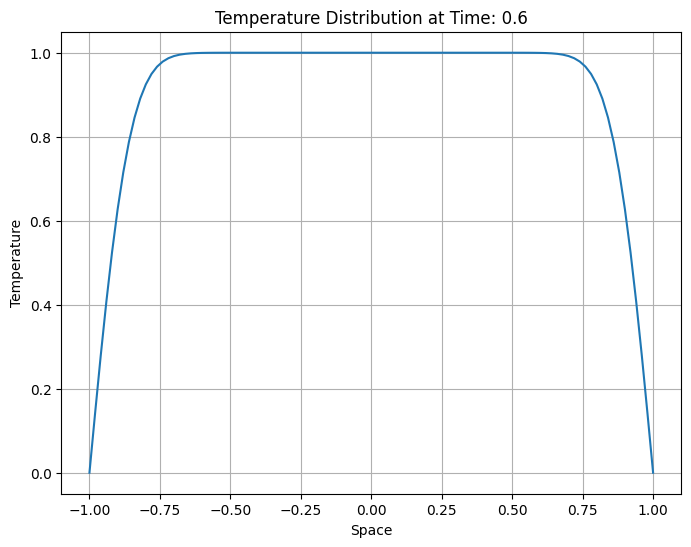

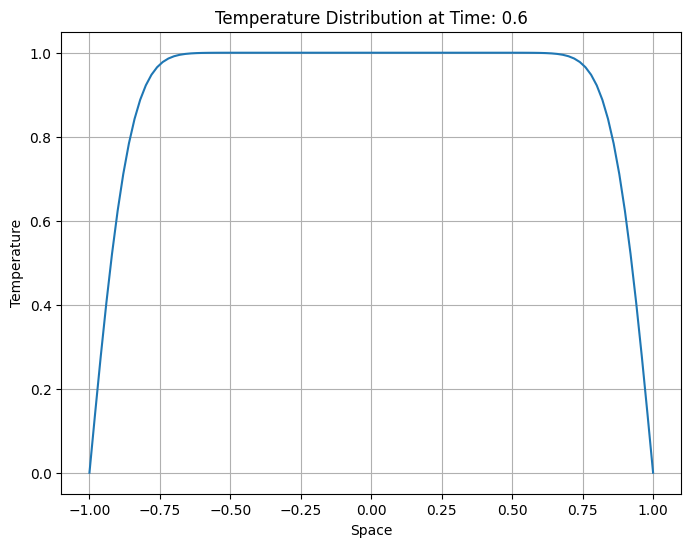

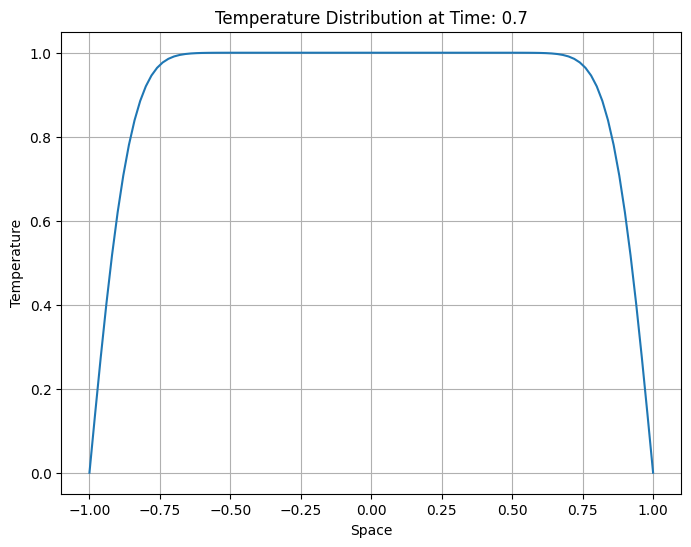

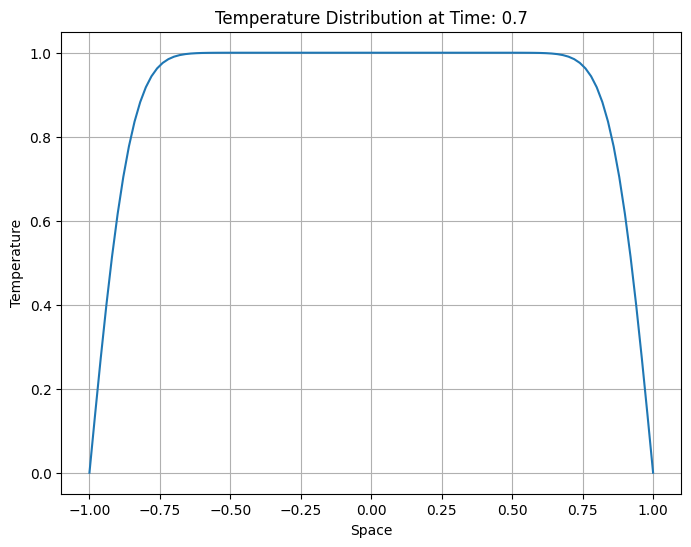

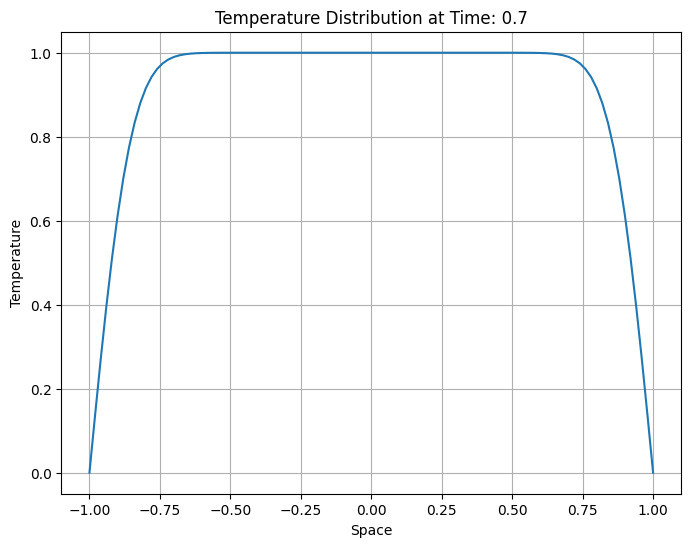

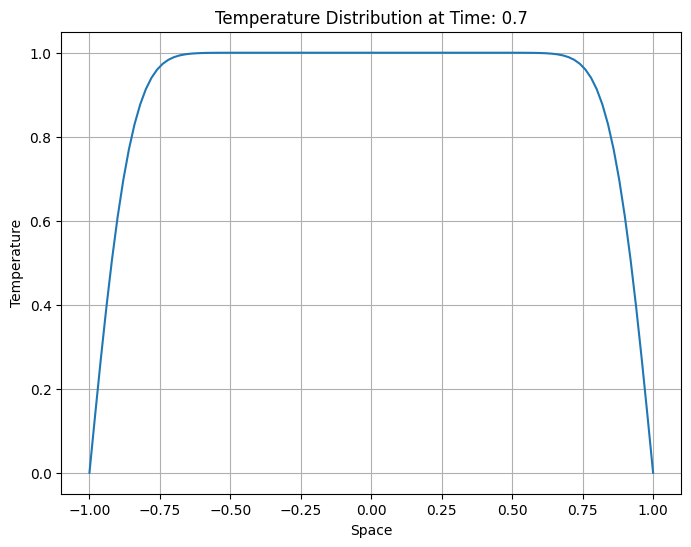

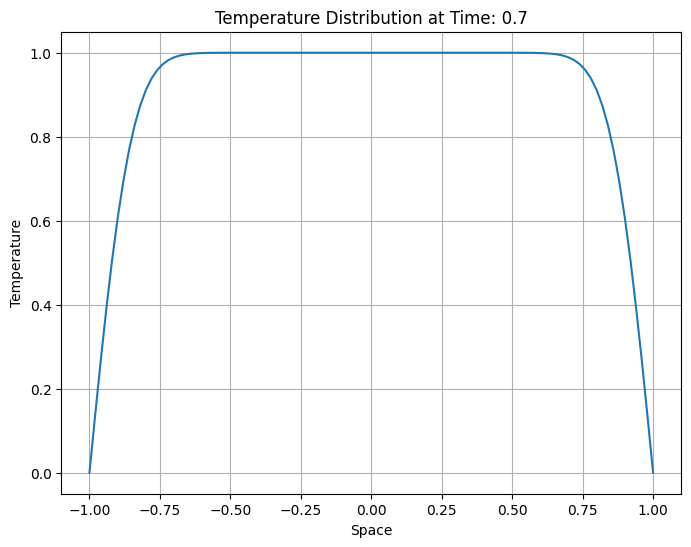

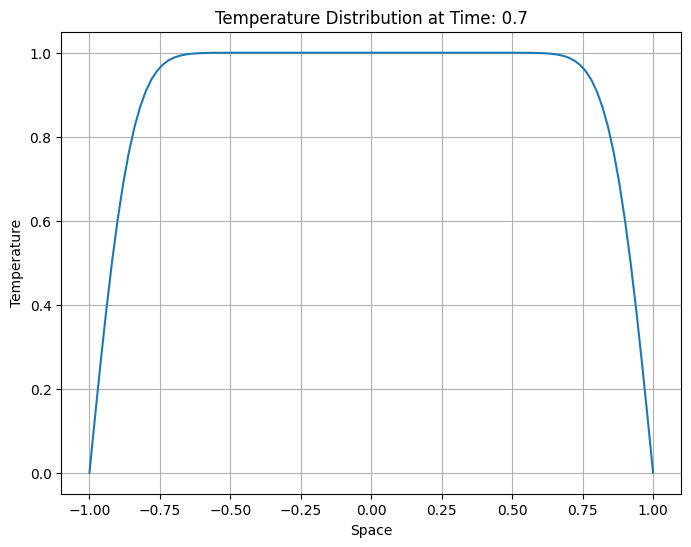

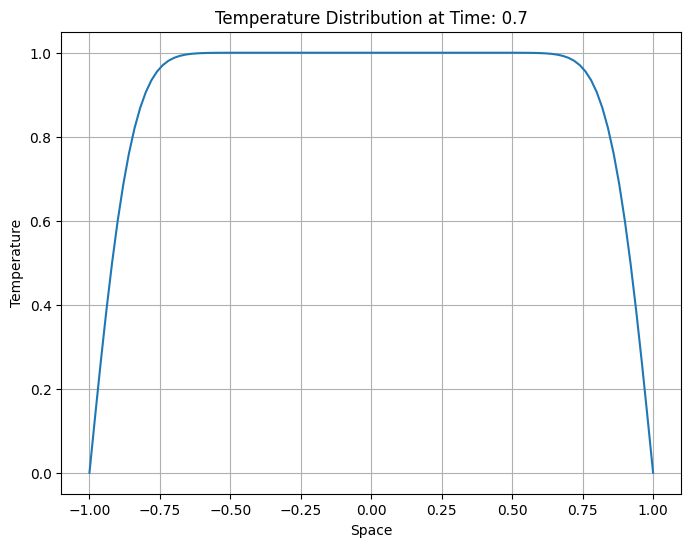

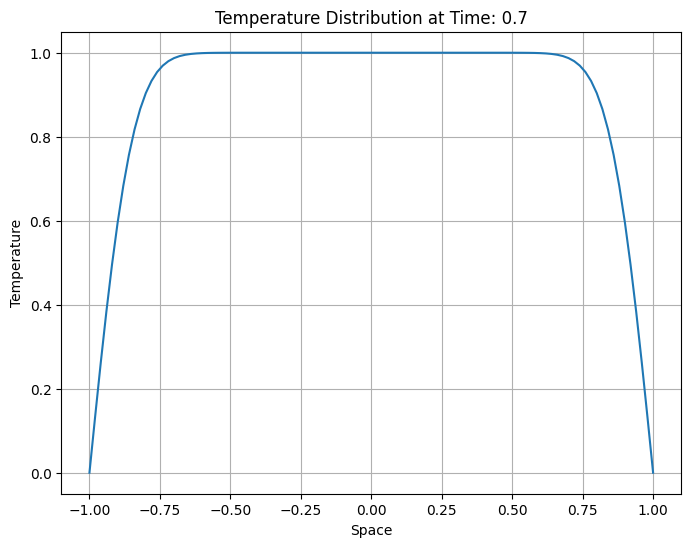

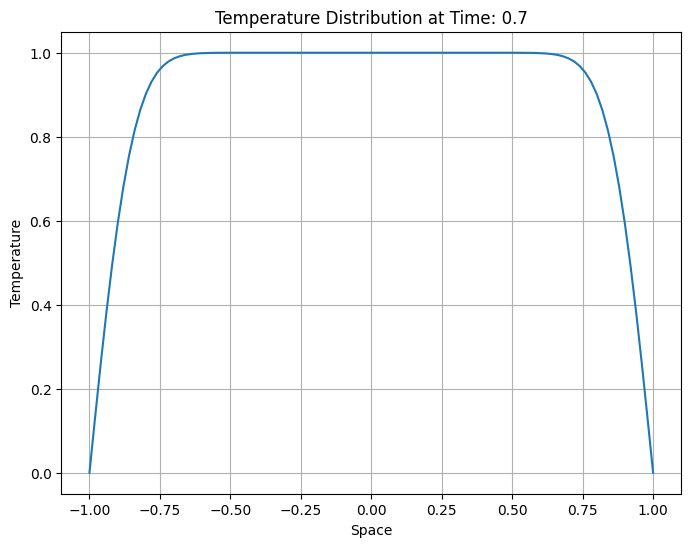

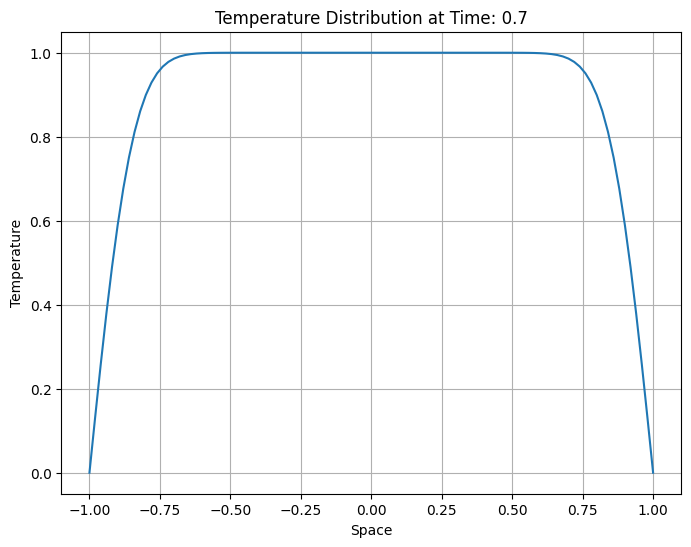

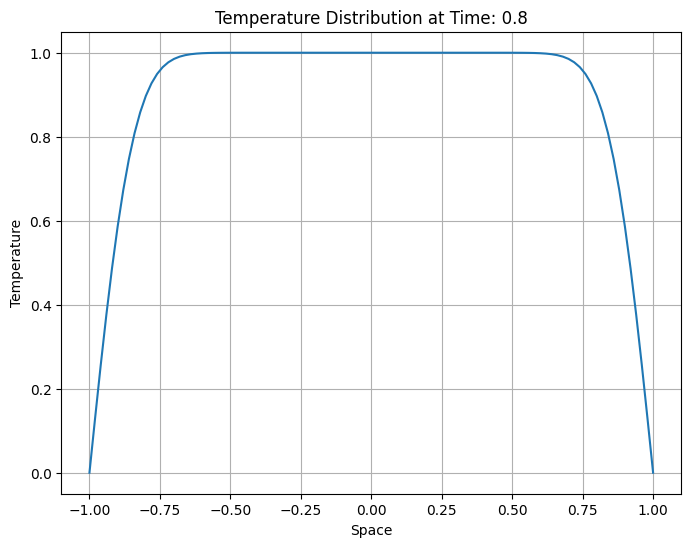

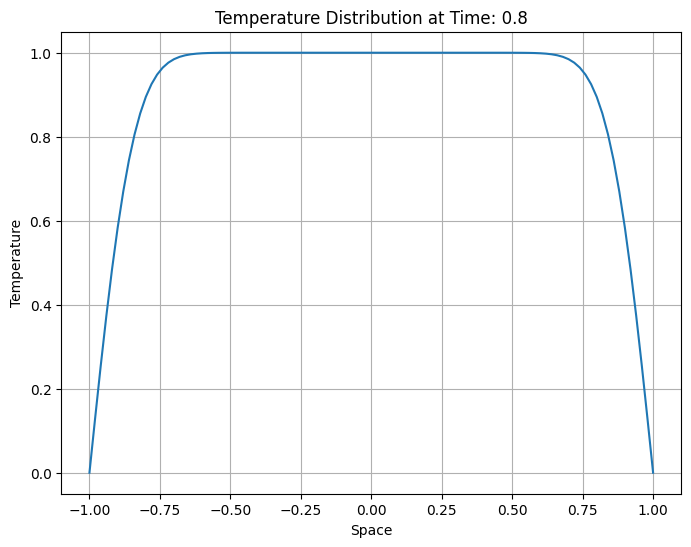

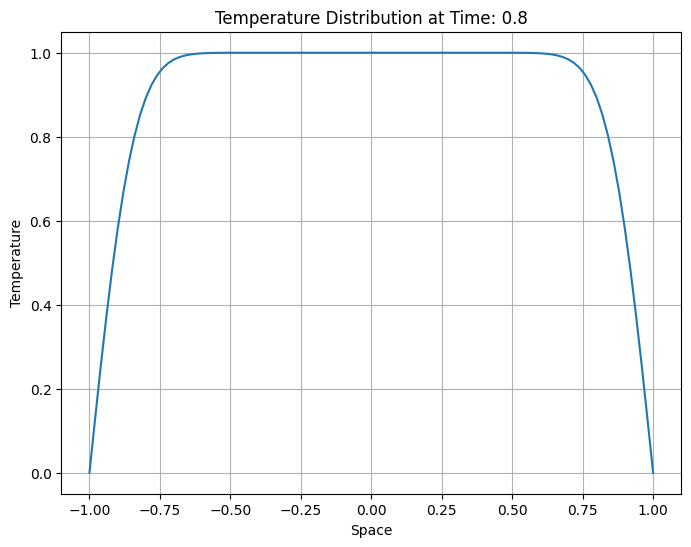

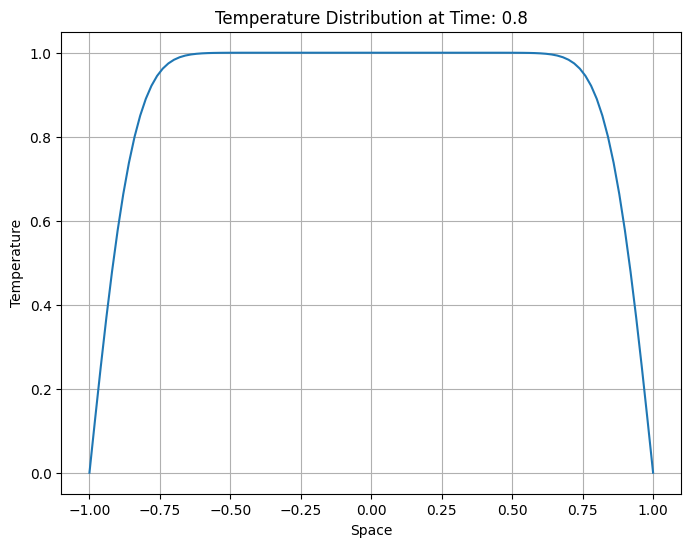

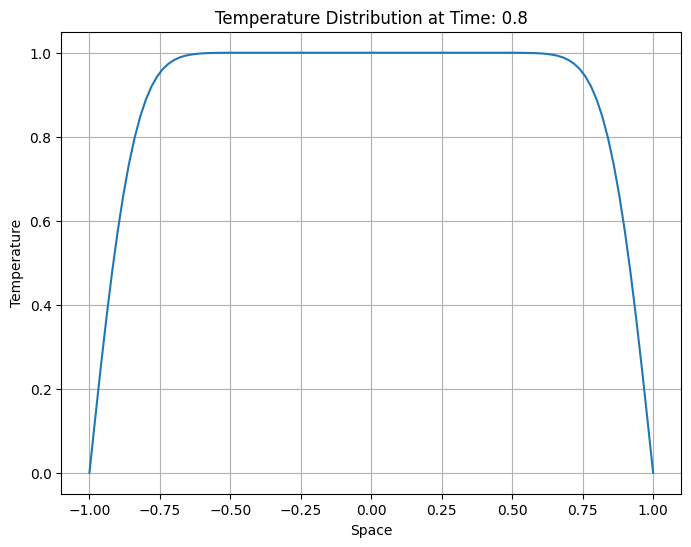

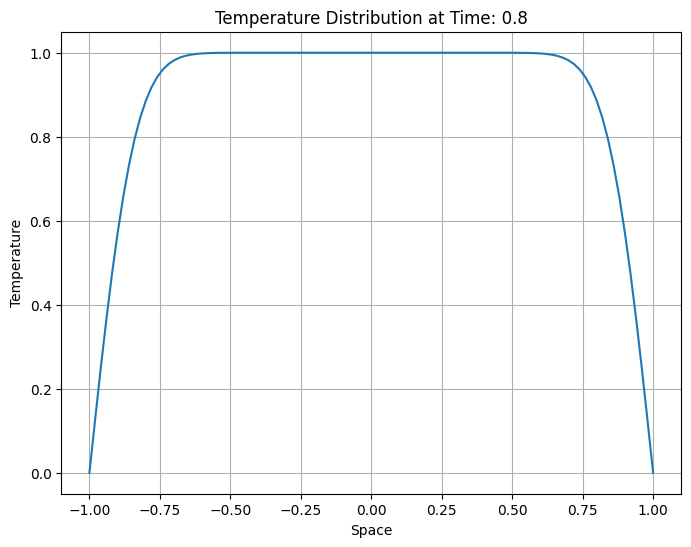

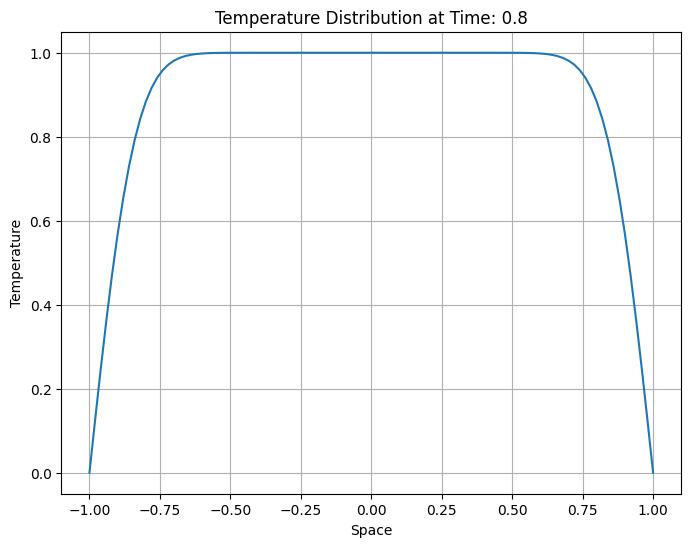

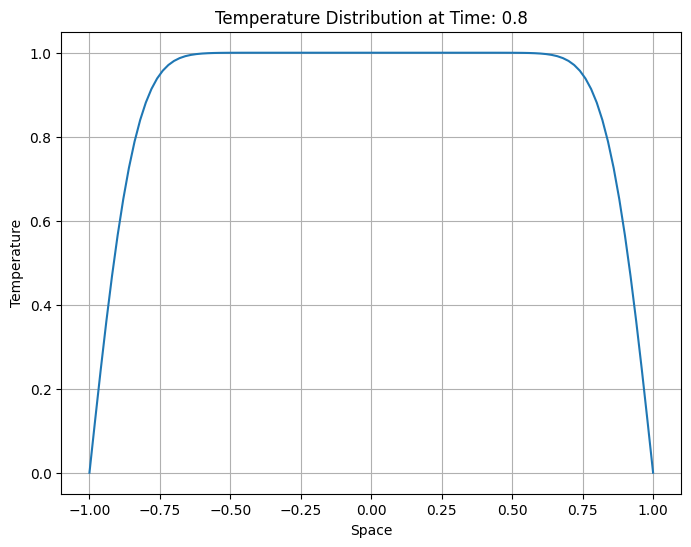

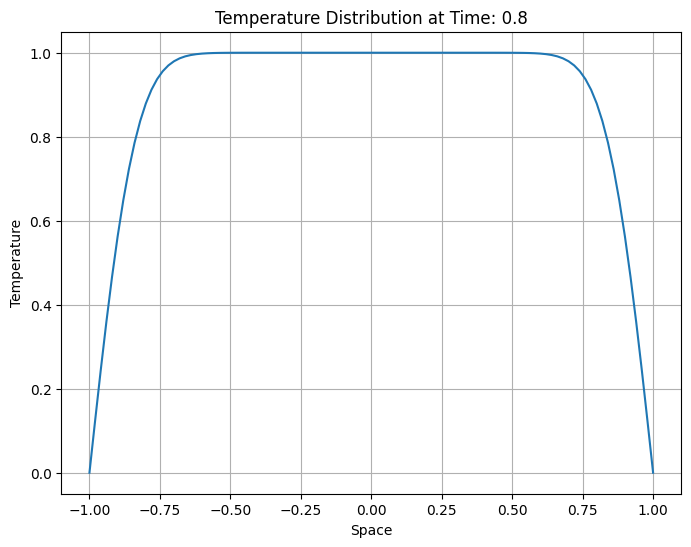

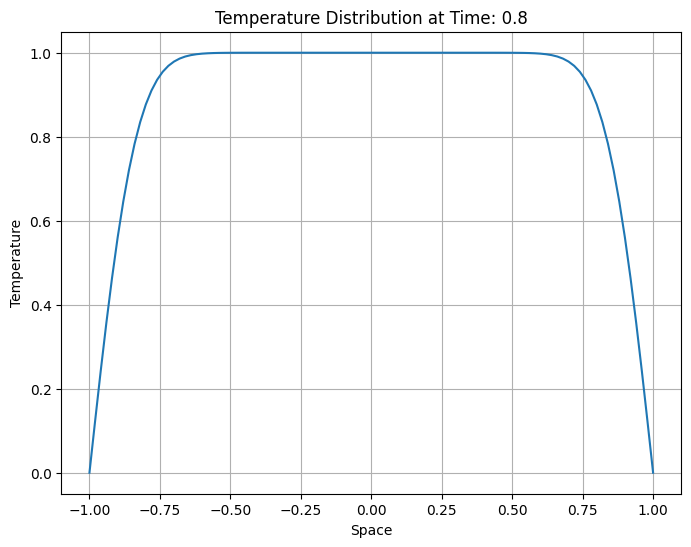

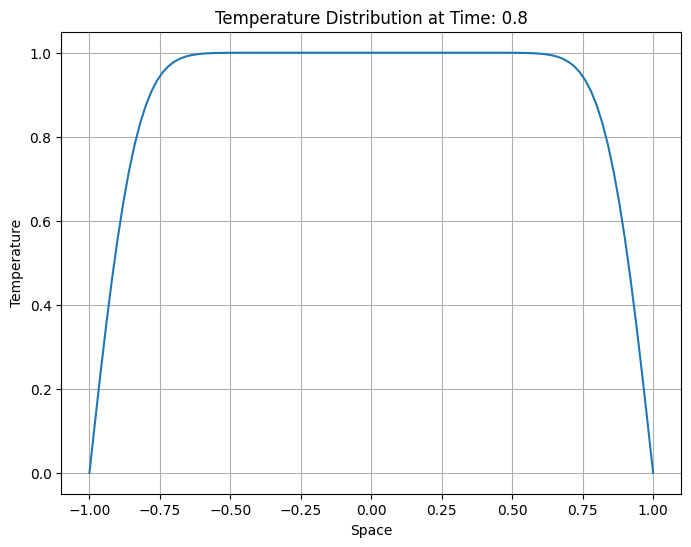

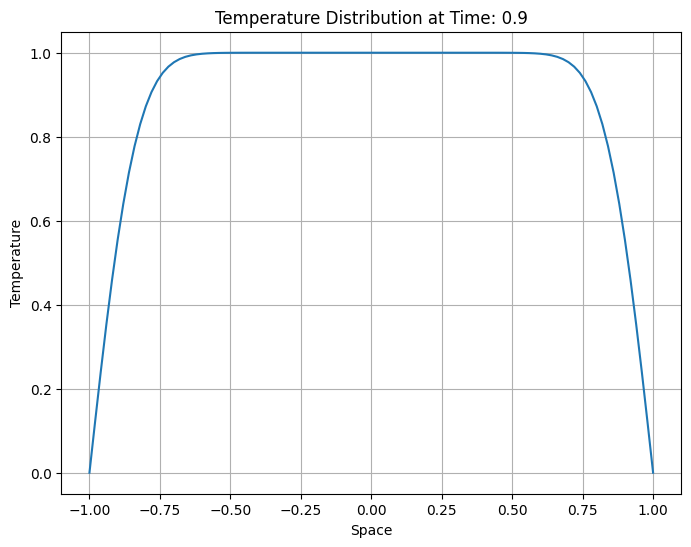

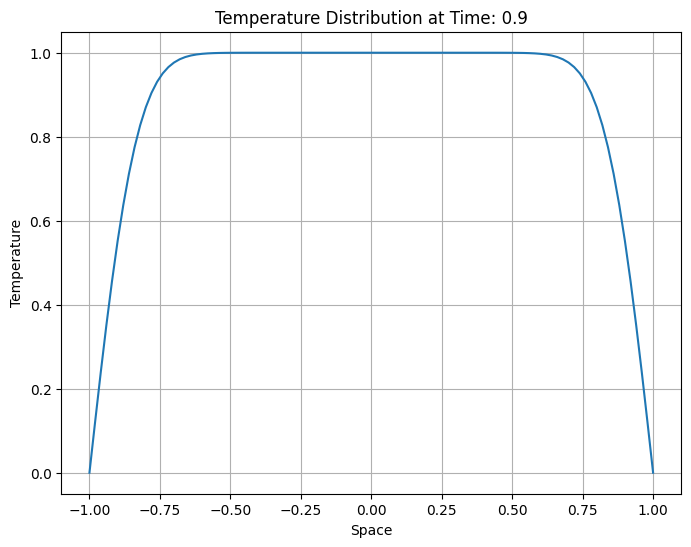

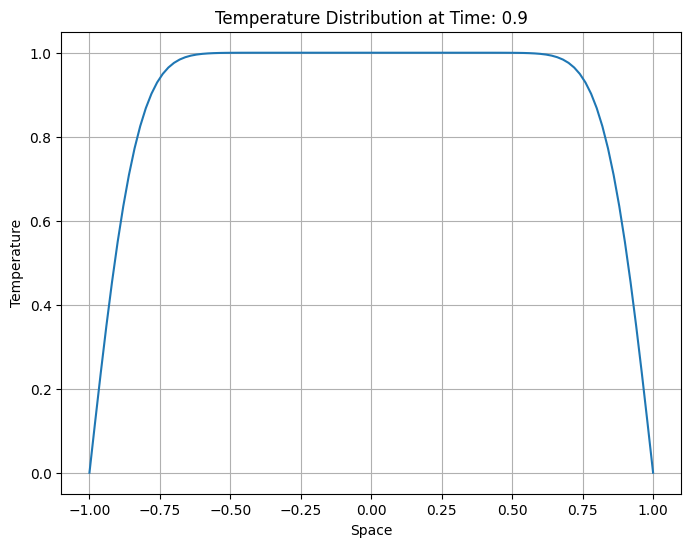

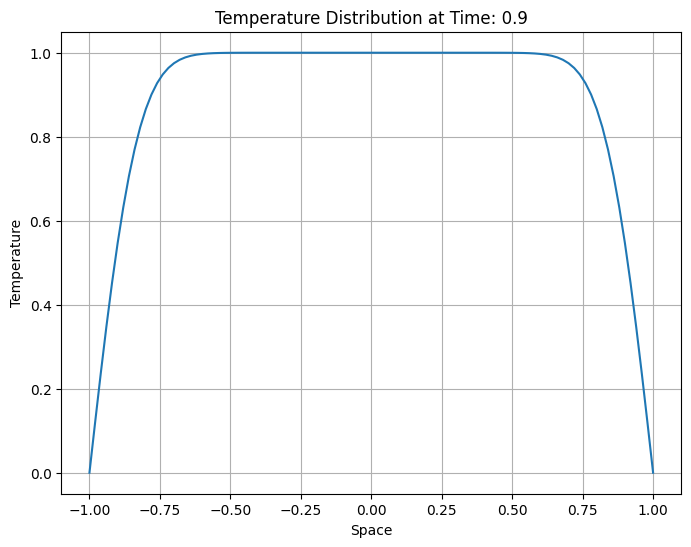

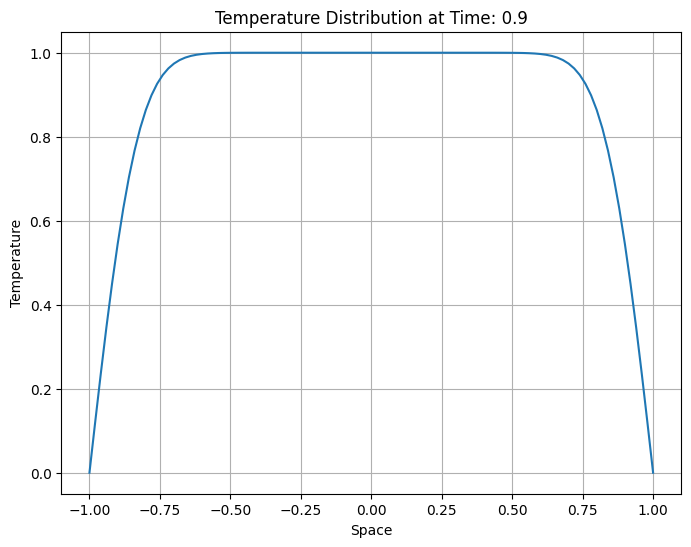

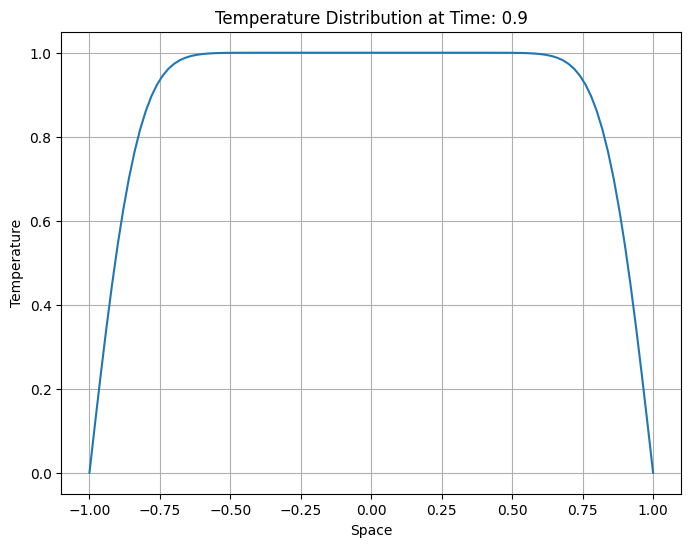

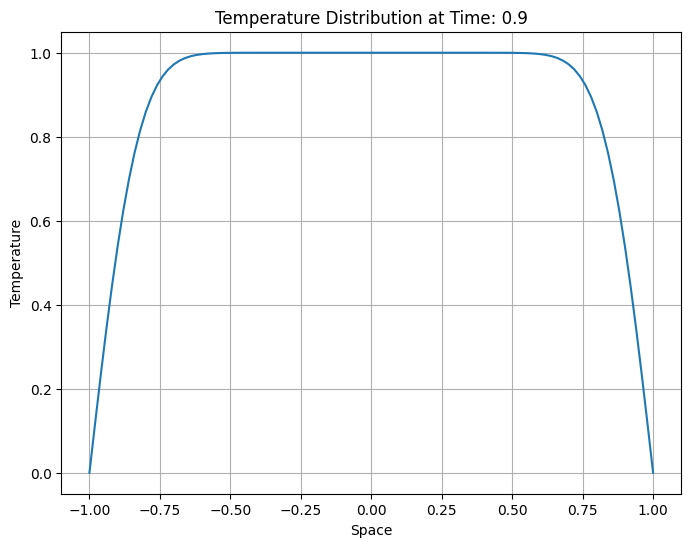

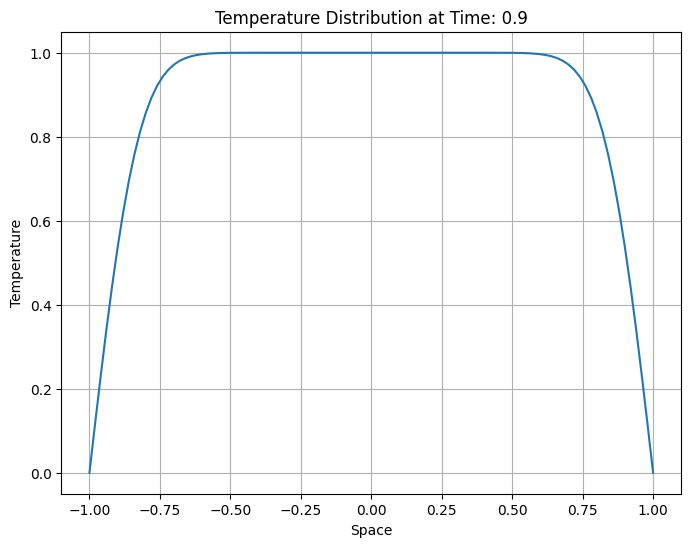

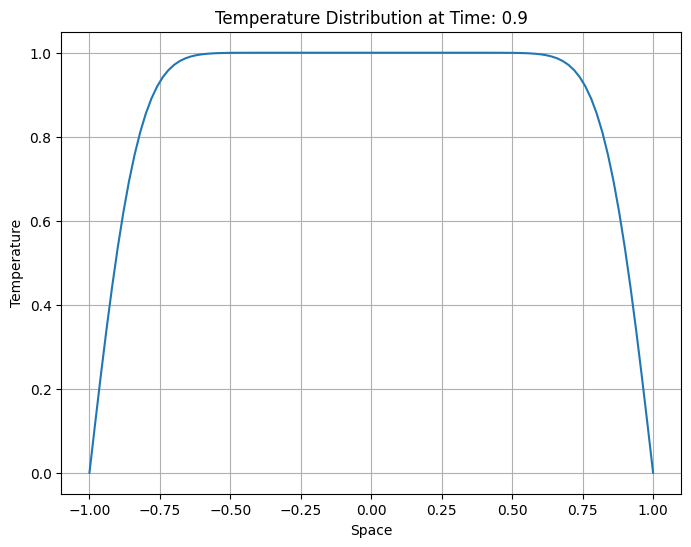

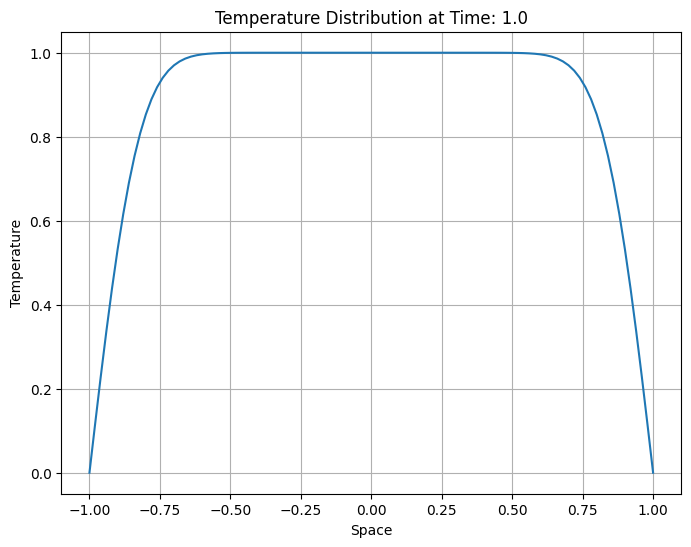

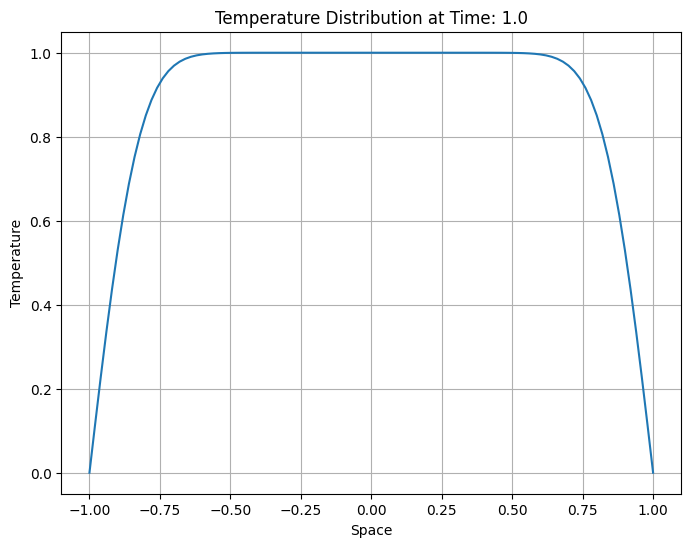

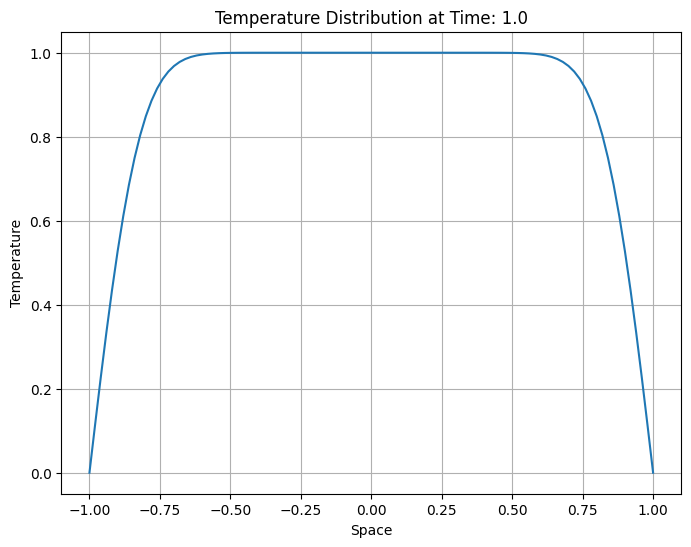

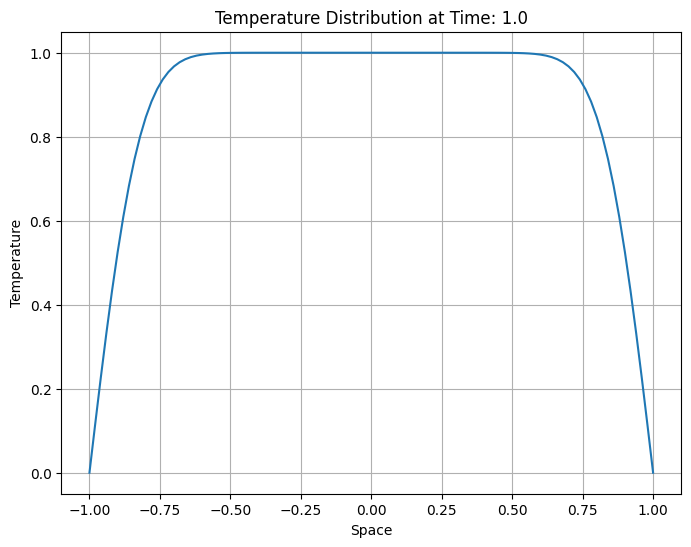

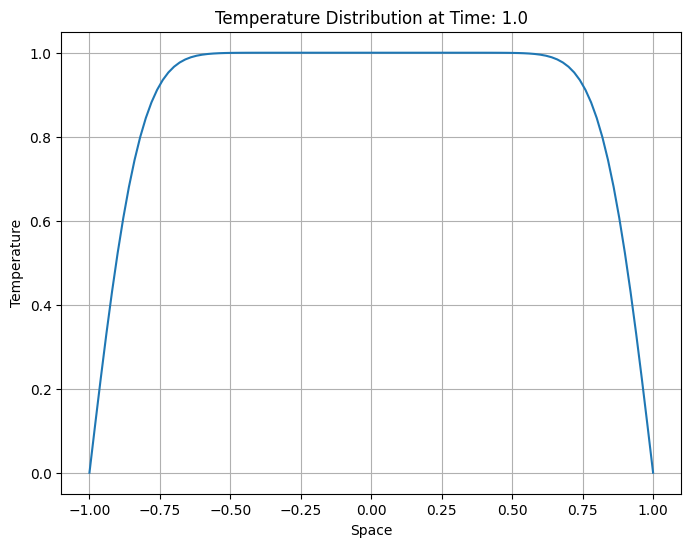

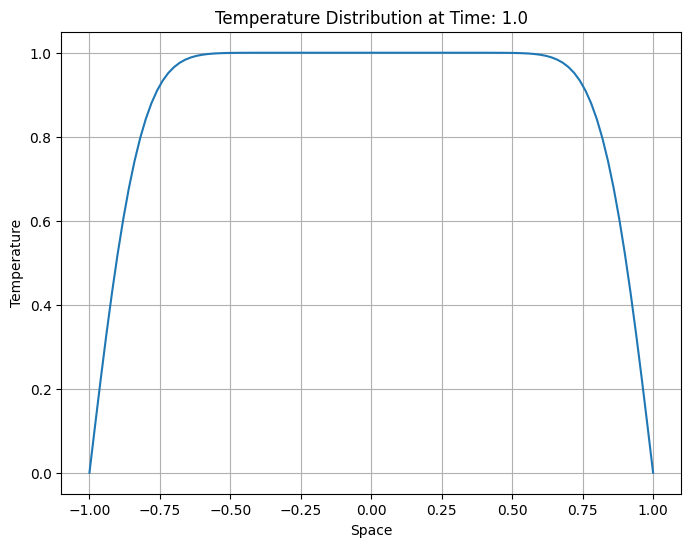

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 初期条件
T = 1.0  # シミュレーション時間
N = 100  # 空間分割数
M = 1000  # 時間ステップ数
alpha = 0.01  # 熱拡散係数

# 初期温度分布
def initial_condition(x):
    return np.ones_like(x)

# 有限要素法による解析
def finite_element_method():
    dx = 2 / N  # 空間ステップサイズ
    dt = T / M  # 時間ステップサイズ

    x = np.linspace(-1, 1, N+1)  # 空間グリッド
    t = np.linspace(0, T, M+1)  # 時間グリッド

    u = np.zeros((N+1, M+1))  # 温度分布の格納用配列

    # 初期条件の設定
    u[:, 0] = initial_condition(x)

    # 有限要素法のメインループ
    for j in range(0, M):
        for i in range(1, N):
            u[i, j+1] = u[i, j] + alpha * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j])

    return u, x, t

# 有限要素法による解析の実行
U, X, T = finite_element_method()

# 初期条件のプロット
plt.figure(figsize=(8, 6))
plt.plot(X, initial_condition(X), label='Initial Condition')
plt.xlabel('Space')
plt.ylabel('Temperature')
plt.title('Initial Temperature Distribution')
plt.legend()
plt.grid(True)
plt.show()

# 温度分布のスナップショットをプロット
for j in range(0, M+1, 10):
    plt.figure(figsize=(8, 6))
    plt.plot(X, U[:, j])
    plt.xlabel('Space')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Distribution at Time: {T[j]:.1f}')
    plt.grid(True)
    plt.show()
